# Group 9 ISSS609  Project Code

# Sephora Sentiments: Unveiling Insights through Text Analytics

# Loading The Packages

In [16]:
import pandas as pd
import numpy as np
from numpy.random import rand
import re

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.random import rand
from ast import literal_eval
from matplotlib import colormaps
import squarify

from wordcloud import WordCloud
import networkx as nx
import pickle
import string
from collections import Counter, defaultdict
import operator
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import gensim
from gensim import corpora


[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


###### run this to get the requirements

# Loading the Data

- Our projects consists of two main data sets :
    - Product information data set which is named as produt_info.
    - Total Reviews, the data come in multiple data sets which will be concatenated into one single data set names as reviews_df

##### Here we explore the Product  Data set

In [17]:
product_info = pd.read_csv("C:\\Users\\leele\\Documents\\GitHub\\text_analytics\\data\\product_info.csv")

In [18]:
product_info.shape

(8494, 27)

In [19]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [20]:
product_info.head()

product_id               product_name  brand_id brand_name  loves_count  \
0    P473671    Fragrance Discovery Set      6342      19-69         6320   
1    P473668    La Habana Eau de Parfum      6342      19-69         3827   
2    P473662  Rainbow Bar Eau de Parfum      6342      19-69         3253   
3    P473660       Kasbah Eau de Parfum      6342      19-69         3018   
4    P473658  Purple Haze Eau de Parfum      6342      19-69         2691   

   rating  reviews            size                      variation_type  \
0  3.6364     11.0             NaN                                 NaN   
1  4.1538     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
2  4.2500     16.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
3  4.4762     21.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
4  3.2308     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   

  variation_value  ... online_only out_of_stock  sephora_exclusive  \
0             NaN  ...           1            0                  0   
1  3.4 oz/ 100 mL  ...           1            0                  0   
2  3.4 oz/ 100 mL  ...           1            0                  0   
3  3.4 oz/ 100 mL  ...           1            0                  0   
4  3.4 oz/ 100 mL  ...           1            0                  0   

                                          highlights  primary_category  \
0  ['Unisex/ Genderless Scent', 'Warm &Spicy Scen...         Fragrance   
1  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
2  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
3  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
4  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   

   secondary_category  tertiary_category  child_count  child_max_price  \
0   Value & Gift Sets  Perfume Gift Sets            0              NaN   
1               Women            Perfume            2             85.0   
2               Women            Perfume            2             75.0   
3               Women            Perfume            2             75.0   
4               Women            Perfume            2             75.0   

   child_min_price  
0              NaN  
1             30.0  
2             30.0  
3             30.0  
4             30.0  

[5 rows x 27 columns]

In [21]:
# Check for any duplicate products in the data set - we filter on the product id

In [22]:
product_info = product_info[~product_info.duplicated(subset = ['product_id'])]

In [23]:
product_info.shape # the total of no of rows did not change which shows that there are no duplicates in the dataset

(8494, 27)

In [24]:
(product_info.isna().mean() * 100).sort_values(ascending=False).round(1) # Percent of missing values

sale_price_usd        96.8
value_price_usd       94.7
variation_desc        85.3
child_max_price       67.6
child_min_price       67.6
highlights            26.0
size                  19.2
variation_value       18.8
variation_type        17.0
tertiary_category     11.7
ingredients           11.1
rating                 3.3
reviews                3.3
secondary_category     0.1
sephora_exclusive      0.0
brand_id               0.0
child_count            0.0
primary_category       0.0
new                    0.0
out_of_stock           0.0
online_only            0.0
limited_edition        0.0
brand_name             0.0
product_name           0.0
price_usd              0.0
loves_count            0.0
product_id             0.0
dtype: float64

In [25]:
product_info.describe().round(2)  # Check data consistency if there are any outliers, trends, etc.

brand_id  loves_count   rating   reviews  price_usd  value_price_usd  \
count   8494.00      8494.00  8216.00   8216.00    8494.00           451.00   
mean    5422.44     29179.57     4.19    448.55      51.66            91.17   
std     1709.60     66092.12     0.52   1101.98      53.67            79.20   
min     1063.00         0.00     1.00      1.00       3.00             0.00   
25%     5333.00      3758.00     3.98     26.00      25.00            45.00   
50%     6157.50      9880.00     4.29    122.00      35.00            67.00   
75%     6328.00     26841.25     4.53    418.00      58.00           108.50   
max     8020.00   1401068.00     5.00  21281.00    1900.00           617.00   

       sale_price_usd  limited_edition      new  online_only  out_of_stock  \
count          270.00          8494.00  8494.00      8494.00       8494.00   
mean            20.21             0.07     0.07         0.22          0.07   
std             24.33             0.26     0.26         0.41          0.26   
min              1.75             0.00     0.00         0.00          0.00   
25%              8.00             0.00     0.00         0.00          0.00   
50%             14.00             0.00     0.00         0.00          0.00   
75%             25.00             0.00     0.00         0.00          0.00   
max            320.00             1.00     1.00         1.00          1.00   

       sephora_exclusive  child_count  child_max_price  child_min_price  
count            8494.00      8494.00          2754.00          2754.00  
mean                0.28         1.63            53.79            39.67  
std                 0.45         5.38            58.77            38.69  
min                 0.00         0.00             3.00             3.00  
25%                 0.00         0.00            22.00            19.00  
50%                 0.00         0.00            32.00            28.00  
75%                 1.00         1.00            59.00            42.00  
max                 1.00       105.00           570.00           400.00

# Data сleansing

from the first glances of the data it is understood that only the 'ingredients' and 'size' columns need to be cleaned and rest of the data is pretty much clean. 
- for now we want to clean this column because bigger zise items can have higher prices and hence when a customer order a bigger size variation and is not happy with the product there are very high chances for a negative review , Ofcourse this will be tested with a correlation matrix at later stages of the analysis.

### The 'size' column

The 'size' column looks significant for the next analysis, so I need to convert its values ​​from strings to numbers. This column contains many different values, such as:
 - 1.7 oz/ 50 mL
 - Mascara Base - 0.13 oz/ 4 mL
 - 11" H x 16" W x 5" L

Let's calculate which units 'oz', 'ml' or 'g' are most common. Sometimes the function will count incorrectly because it will encounter values ​​such as 'Or**g**anic Crema 25 ml', but this is an acceptable error

In [26]:
units = ['oz', 'ml', 'g']
counter = [sum(isinstance(val, str) and unit in val.lower() 
          for val in product_info['size']) 
          for unit in units]

for unit, number in zip(units, counter):
    print(f'{unit} = {number}')

oz = 6614
ml = 5170
g = 1300


Since most products are in ounce format, let's write a function that extracts the ounces in 'float' format for each product, otherwise it returns NaN

In [27]:
def get_oz_values(val: any) -> any:
    """Extracts the value representing ounces, otherwise returns NaN.
    
    Returns:
        int | float | np.nan
    """

    if isinstance(val, str) and ('oz' in val.lower()):
        try:
            oz_start = val.lower().find('oz')
            clean_val = val[:oz_start].strip().lower().replace('fl.', '').replace('–', '*') \
                .replace('fl', '').replace('x', '*').replace('-', '*')
            if '/' in clean_val:
                clean_val = clean_val[clean_val.find('/') + 1:].strip()
            if '*' in clean_val:
                i = [x.isdigit() for x in clean_val].index(True)
                clean_val = round(eval(clean_val[i:]), 2)
            return float(clean_val)
        except:
            return np.nan

    elif isinstance(val, (int, float)):
        return val

    else:
        return np.nan

Using the new function, I will create a new column 'size_oz' and look at the result written in it

In [28]:
# Create a new column containing only the ounce values
product_info['size_oz'] = (product_info['size'].apply(get_oz_values)).to_frame()

# Show first rows of original and new columns
with pd.option_context('display.max_colwidth', 20, 'display.max_columns', None):
    display(product_info[['size', 'size_oz']].head(10))

# Show how many non-null values in new column and what is the data type
non_null_count = product_info['size_oz'].count()
data_type = product_info['size_oz'].dtype
print(f'\nColumn "size_oz" has:\n'
      f'  - non-null values: {non_null_count} (df size is {len(product_info)})\n'
      f'  - data type: {data_type} \n')

size  size_oz
0              NaN      NaN
1   3.4 oz/ 100 mL     3.40
2   3.4 oz/ 100 mL     3.40
3   3.4 oz/ 100 mL     3.40
4   3.4 oz/ 100 mL     3.40
5  0.25 oz/ 7.5 mL     0.25
6  0.25 oz/ 7.5 mL     0.25
7   3.4 oz/ 100 mL     3.40
8   3.4 oz/ 100 mL     3.40
9  0.25 oz/ 7.5 mL     0.25


Column "size_oz" has:
  - non-null values: 6595 (df size is 8494)
  - data type: float64 



For clarity, We'll also visualize the 10 most frequent volumes/weights in ounces

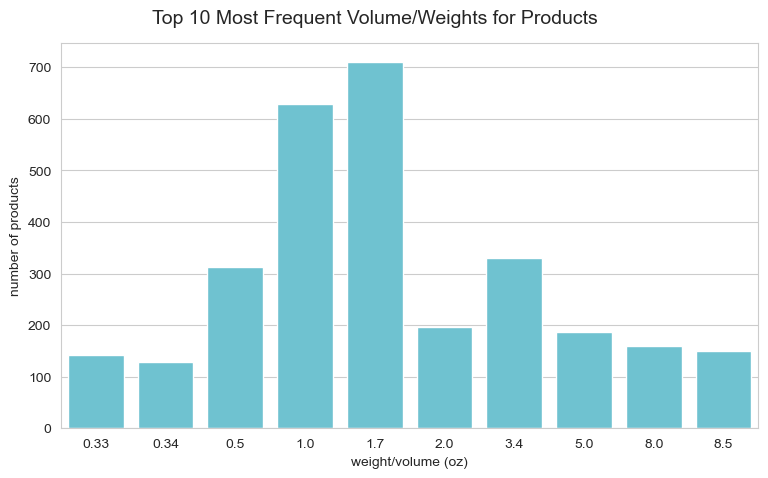

In [29]:
count_ounces = product_info['size_oz'].value_counts().rename_axis('size_oz').reset_index(name='count').round(2).head(10)

sns.set_style('whitegrid')
sns.barplot(x='size_oz', y='count', data=count_ounces, color='#5FCEE0').set(ylabel='number of products', xlabel='weight/volume (oz)')
plt.title('Top 10 Most Frequent Volume/Weights for Products', fontsize=14, y=1.03, x=0.45)
plt.gcf().set_size_inches(9, 5);

# Correlation Analysis

Below we will construct a correlation matrix:
- Pearson's correlation matrix

> What Is Pearson correlation Matrix ?
>
> Pearson's correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables

Although the Pearson correlation is a widely used, it has some limitations. It only applies to continuous variables and linear relationships, and is sensitive to outliers. However, it is a classic useful way to look at the data through this matrix for a complete analysis.


In [30]:
# Select columns of interest for correlation matrices
columns = ['loves_count', 'rating', 'reviews', 'size_oz',  
       'variation_type', 'price_usd', 'value_price_usd', 'sale_price_usd',
       'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive', 'primary_category', 'secondary_category',
       'tertiary_category', 'child_count', 'child_min_price', 'child_max_price']

In [31]:
# Compute the correlation matrix
corr = product_info[columns].corr()

# Set up the figure size
f, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, vmax=1, vmin=-1, center=0, annot=True, fmt='.2f',
            mask=np.triu(np.ones_like(corr, dtype=bool)),  # Mask for the upper triangle
            cmap='Spectral_r',
            linewidths=.5, cbar_kws={'shrink':.5});

ValueError: could not convert string to float: 'Size + Concentration + Formulation'

Based on this Pearson's correlation matrix, we observe the following:

High correlation
- **reviews** | **loves_count**. The more reviews, the more likes (and vice versa). Obviously these are indicators of the popularity of the product 
- **price_usd** | **sale_price_usd** | **value_price_usd**. It is also obvious that they are related, since the calculation of the value and the discount price is based on the normal price of the product
- **child_min_price** | **child_max_price** | **all prices**. It can be seen that variations of the same product do not have significant price differences from the basic price and the relationship between them is clearly visible
- **child_min_price** | **child_max_price**. If a product has only one variation, its price is written in both columns at once, which is why the connection is so strong

Medium correlation
- **child_count** | **loves_count**. The more variations a product has, the more likes it gets. Given that there is a strong correlation between the number of likes and reviews, we assume that products with more variations will have more reviews

Low correlation
- **online_only** | **sale_price_usd**. Probably products sold online only more often at discounts
- **child_count** | **reviews**. Another confirmation of the assumption made earlier in the 'Medium correlation' section

## Distribution of products by categories

Let's visualize how many total products are in each primary category. 
Since the 'Gifts' category has only 4 products, exclude it from the following chart:

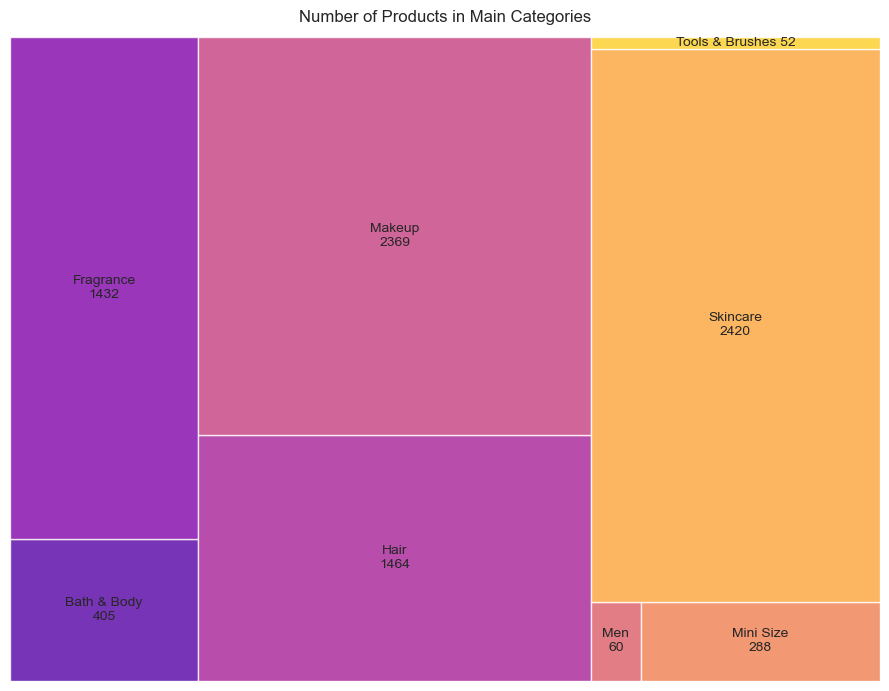

In [32]:
# Create the dataframe
df2 = product_info[['product_id', 'primary_category']].drop(product_info[product_info.primary_category == 'Gifts'].index)

# Create a pivot table to count the number of products in each category
pivot_table = pd.pivot_table(df2, index=['primary_category'], values='product_id', aggfunc='count')
pivot_table.reset_index(inplace=True)
pivot_table.columns = ['primary_category', 'count']

# Create the labels for the treemap
labels = pivot_table.apply(lambda x: f"{x['primary_category']} {x['count']}" 
                           if x['primary_category'] == 'Tools & Brushes' 
                           else f"{x['primary_category']}\n{x['count']}", 
                           axis=1).to_list()

# Create the values for the treemap
values = pivot_table['count'].tolist()

# Create colors for the treemap, change the 'plasma' colormap to make it lighter
lighter_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'lighter_plasma', mpl.colormaps['plasma'](np.linspace(0.15, 1, 256)))
x = rand(8)  # 8 rectangles used
colors = [lighter_cmap(i) for i in np.arange(0, 1, 1/len(x))]

# Set the size of the plot
fig = plt.figure(figsize=(9, 7))

# Create the treemap
squarify.plot(sizes=values, label=labels, color=colors, alpha=.8, text_kwargs={'fontsize':10}, norm_x=200)

# Adjust the plot parameters
plt.title('Number of Products in Main Categories', y=1.01)
plt.axis('off')
plt.tight_layout()

As we can see, most products fall into 4 categories, which is consistent with general [statistics](https://explodingtopics.com/blog/beauty-industry-stats#skincare-products-stats) about the beauty industry.We assume Skin care should easily be one of the most revenue generating category.

Next, We'll do a visualization showing the distribution of products into more general primary categories and narrowly focused tertiary categories.
- this can give an very rough idea what could be most frequently taked about topics in the reviwes.

In [33]:
# How many products have both tertiary and primary categories?
(product_info.groupby('primary_category', dropna=True)['tertiary_category'].agg(['count'])
   .sort_values('count', ascending=False)
   .reset_index())

primary_category  count
0           Makeup   2216
1         Skincare   2040
2        Fragrance   1416
3             Hair   1345
4      Bath & Body    377
5              Men     59
6  Tools & Brushes     51
7            Gifts      0
8        Mini Size      0

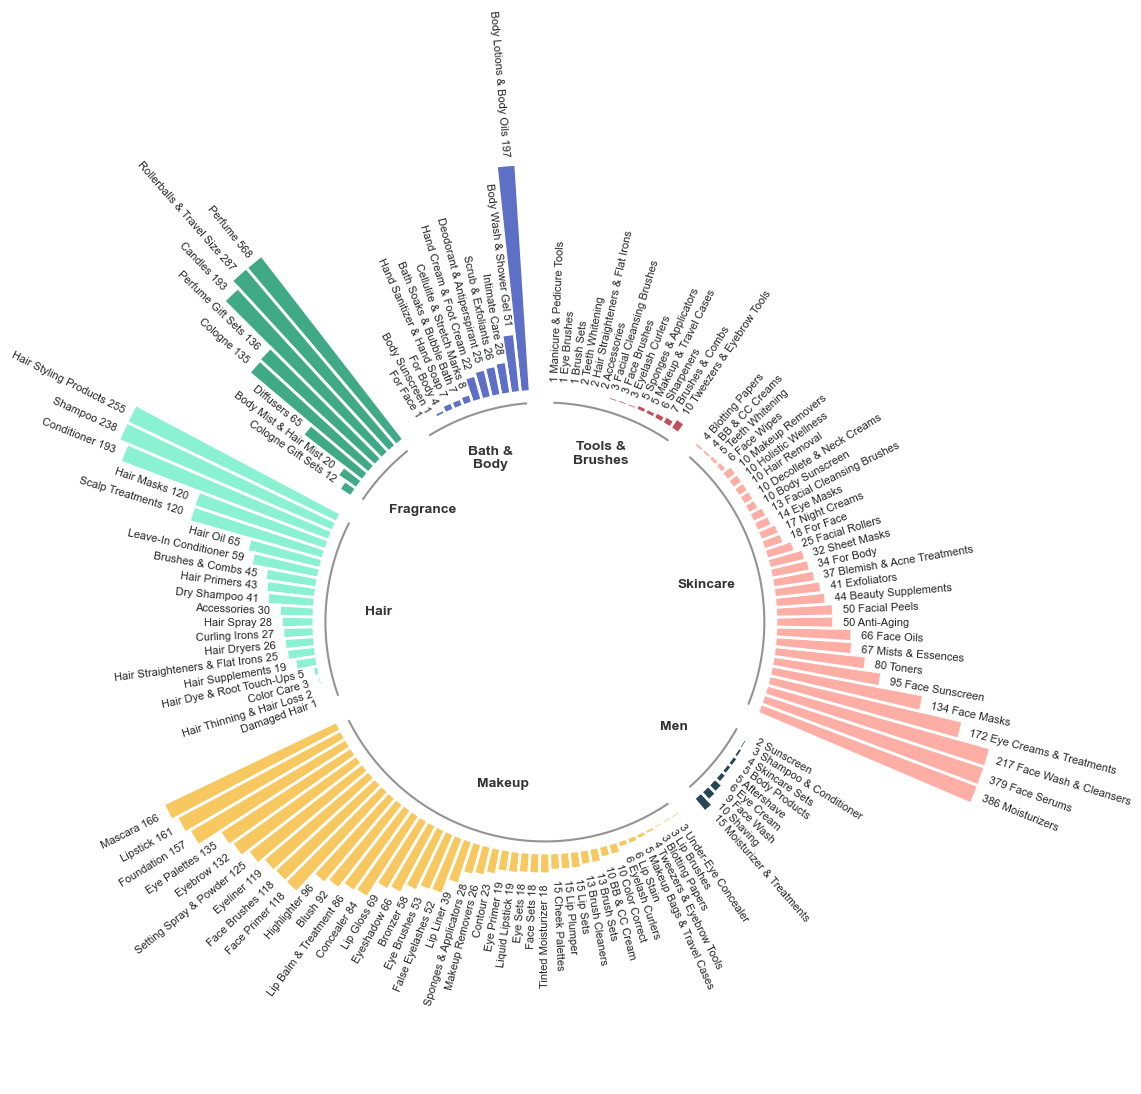

In [34]:
######################
# Arrange data frame and extract all required values

# Create sorted dataframe and exclude Gifts and Mini Size categories
df_sorted = (
    product_info.loc[~product_info['primary_category'].isin(['Gifts', 'Mini Size'])]
    .groupby(['primary_category', 'tertiary_category'], dropna=True)
    .size()
    .reset_index(name='count')
    # .query('count > 2')
    .sort_values(['primary_category', 'count'], ascending=[1, 0])
)

# Create variables based on sorted dataframe
VAL_LABEL = df_sorted['count'].values
VALUES = np.where(df_sorted['count'] > 450, df_sorted['count'] / 4, df_sorted['count'] / 2)
LABELS = df_sorted['tertiary_category'].values
GROUP = df_sorted['primary_category'].values
GROUPS_SIZE = df_sorted.groupby('primary_category')['tertiary_category'].count().tolist()

######################
# Basic shape, color and size settings

# Shape setting
PAD = 2
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)
OFFSET = np.pi / 2

# Color setting
color_map = {
    'Tools & Brushes': '#C34F5A', # firebrick
    'Skincare': '#feaea5', # salad green
    'Men': '#264653', # dark blue
    'Makeup': '#f6c85f', # yellow
    'Hair': '#8af2d2', # light blue
    'Fragrance': '#40aa87', # green
    'Bath & Body': '#5d70c6'# sapphire blue
    }
COLORS = [color_map[group] for group in GROUP]


# Size setting
offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD


fig, ax = plt.subplots(figsize=(22, 12), subplot_kw={'projection': 'polar'})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

######################
# Add bars and text for each subcategory (tertiary category)

def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = 'right'
        rotation = rotation + 180
    else: 
        alignment = 'left'
    return rotation, alignment

def add_labels(angles, values, labels, val_label, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them
    for angle, value, label, val_label in zip(angles, values, labels, val_label):
        angle = angle
        if value >= 100:
            value = 100
        
        # Obtain text rotation, alignment and label names
        rotation, alignment = get_label_rotation(angle, offset)

        if alignment == 'right':
            s = f'{label} {val_label}'
        else:
            s = f'{val_label} {label}'
            

        # Add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=s, 
            ha=alignment, 
            va='center', 
            rotation=rotation, 
            rotation_mode='anchor',
            fontsize=8
        )

# Create bars
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor='white', linewidth=2
)

# Add labels for each subcategory (tertiary category)
add_labels(ANGLES[IDXS], VALUES, LABELS, VAL_LABEL, OFFSET, ax)

######################
# Add lines and annotations for each group (primary category)

offset = 0
for group, size in zip(list(np.unique(GROUP)), GROUPS_SIZE):
    # Calculate x coordinates for the current group and plot a line below the bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color='#939393')
    
    # Add text to indicate group
    if group == 'Tools & Brushes':
        mod_group = 'Tools &\nBrushes'
        ax.text(
            np.mean(x1), -23, mod_group, color='#333333', fontsize=10, 
            fontweight='bold', ha='center', va='center'
        )
    elif group == 'Bath & Body':
        mod_group = 'Bath &\nBody'
        ax.text(
            np.mean(x1), -25, mod_group, color='#333333', fontsize=10, 
            fontweight='bold', ha='center', va='center'
        )
    else:
        ax.text(
            np.mean(x1), -28, group, color='#333333', fontsize=10, 
            fontweight='bold', ha='center', va='center'
        )
    # Update the offset for the next group
    offset += size + PAD

## Customer favorite

According to a lot of research, the availability of ratings and reviews plays a crucial role in the process of choosing and buying products online, so their distribution can tell us a lot.

### Average likes, ratings and reviews by category

A quick look at the average distribution of the parameters of interest by category. In general, I see confirmation of the correlation established at the beginning between the number of 'loves' and the reviews. 

In [35]:
(product_info.groupby('primary_category')
   .agg(total_prod=('product_id', 'count'),
       avg_rating=('rating', 'mean'),
       avg_reviews=('reviews', 'mean'),
       avg_loves=('loves_count', 'mean'))
   .sort_values('total_prod', ascending=False)
   .round(2)
   .reset_index())

primary_category  total_prod  avg_rating  avg_reviews  avg_loves
0         Skincare        2420        4.23       463.87   27111.17
1           Makeup        2369        4.15       682.00   54235.49
2             Hair        1464        4.20       253.90   13710.24
3        Fragrance        1432        4.23       266.23   12757.71
4      Bath & Body         405        4.20       198.99   16453.69
5        Mini Size         288        4.01       719.05   26676.97
6              Men          60        4.50        72.71    4855.87
7  Tools & Brushes          52        4.27       220.08   14988.88
8            Gifts           4        4.56        17.00       0.00

### Products

Bazaarvoice as a service provider, talks about the [importance](https://www.bazaarvoice.com/blog/why-ratings-and-reviews-are-important-for-your-business/) of ratings and reviews for the business. Let's see how many products have no stars or reviews at all:

In [36]:
# How many products don't have reviews, ratings, or 'love' from customers?
print('Total products in the online store:', product_info.shape[0])
print('\nNo reviews:', len(product_info[product_info['reviews'] == 0]))
print('No "love" (equivalent of likes):', len(product_info[product_info['loves_count'] == 0]))
print('No rating (no stars):', len(product_info[product_info['rating'] == 0]))

Total products in the online store: 8494

No reviews: 0
No "love" (equivalent of likes): 91
No rating (no stars): 0


Every product in this store has at least one review and a non-zero rating! Consistently putting words into action.

Find the 10 products with the most 'loves':

In [37]:
# Top 10 products with the most loves (=likes) count
(product_info[['product_name','brand_name', 'tertiary_category', 
     'loves_count', 'rating', 'reviews']]
     .sort_values('loves_count', ascending=False).head(10))

product_name  \
6242                            Soft Pinch Liquid Blush   
5249                           Radiant Creamy Concealer   
4431  Lip Sleeping Mask Intense Hydration with Vitam...   
6434                    Cream Lip Stain Liquid Lipstick   
2523                 Gloss Bomb Universal Lip Luminizer   
2524   Pro Filt’r Soft Matte Longwear Liquid Foundation   
5250                                              Blush   
247           Brow Wiz Ultra-Slim Precision Brow Pencil   
4458                   Translucent Loose Setting Powder   
7648        Niacinamide 10% + Zinc 1% Oil Control Serum   

                       brand_name       tertiary_category  loves_count  \
6242  Rare Beauty by Selena Gomez                   Blush      1401068   
5249                         NARS               Concealer      1153594   
4431                      LANEIGE                     NaN      1081315   
6434           SEPHORA COLLECTION                Lipstick      1029051   
2523      Fenty Beauty by Rihanna               Lip Gloss       968317   
2524      Fenty Beauty by Rihanna              Foundation       856497   
5250                         NARS                   Blush       840076   
247       Anastasia Beverly Hills                 Eyebrow       834189   
4458                Laura Mercier  Setting Spray & Powder       813497   
7648                 The Ordinary             Face Serums       763168   

      rating  reviews  
6242  4.5356   4733.0  
5249  4.3080  12887.0  
4431  4.3508  16118.0  
6434  4.3201  11111.0  
2523  4.6357  12136.0  
2524  4.0356  16935.0  
5250  4.6643  18127.0  
247   4.4056  15885.0  
4458  4.5029   9335.0  
7648  4.2439   5778.0

The first product on the list and the last two look interesting, as you can see compared to the rest of the products, they should have a lot more reviews with so many likes.

The number of reviews seems to be the most trustworthy feature for analyzing the popularity of products, let's continue with the reviews. Just now we saw the best products, are there outsiders in the store? 

According to [research](https://spiegel.medill.northwestern.edu/wp-content/uploads/sites/2/2021/04/Spiegel_Online-Review_eBook_Jun2017_FINAL.pdf), a customer should read at least 11 (and [the more the better](https://www.powerreviews.com/blog/how-many-product-reviews/#:~:text=Consumers%20Pay%20Attention%20to%20Review%20Quantity&text=Our%20research%20found%20that%2099,have%20more%20than%20100%20reviews.)) reviews to make sure that this product has been tried by enough people and overcome the fear of buying an unknown product.

For the following table, I used a threshold of 20 reviews:

In [38]:
# Top 10 worst rated products (with at least 20 reviews)
(product_info[['product_name','brand_name', 'tertiary_category', 'rating', 
     'price_usd', 'reviews', 'loves_count']]
     .query('reviews >= 20')
     .sort_values('rating', ascending=True)
     .head(10))

product_name               brand_name  \
340                        Laminated Look Brow Kit  Anastasia Beverly Hills   
6920              Mini Super Slick Tinted Lip Balm          SIMIHAZE BEAUTY   
2723                Holiday Candle Advent Calendar               FORVR Mood   
4511      Mini Translucent Pure Setting Spray 16HR            Laura Mercier   
4567  Click Magnetic Collection Starter Kit—Bestie             Lilly Lashes   
3073                             Nail Art Stickers                    Gucci   
6774                        Color Safe Conditioner       SEPHORA COLLECTION   
6696                             Eyebrow Razor Set       SEPHORA COLLECTION   
6657                 LashCraft Have It All Mascara       SEPHORA COLLECTION   
5290                High-Pigment Longwear Eyeliner                     NARS   

           tertiary_category  rating  price_usd  reviews  loves_count  
340                  Eyebrow  1.1905       24.0     21.0         3778  
6920                Lipstick  1.6667       24.0     33.0         6499  
2723                 Candles  1.7727       75.0     22.0         5095  
4511  Setting Spray & Powder  1.7727       21.0     22.0         2607  
4567         False Eyelashes  1.8750       35.0     32.0         3034  
3073                     NaN  1.9355       20.0     31.0         4551  
6774             Conditioner  2.1429       12.0     21.0         1000  
6696                 Eyebrow  2.1739       10.0     23.0         4770  
6657                 Mascara  2.2622       12.0    164.0         8251  
5290                Eyeliner  2.2627       24.0    236.0        19169

Rating - is a 5 star rating system.  Let's see below what distribution of products by rating

In [39]:
# Distribution of products by rating
product_info['rating_scale'] = pd.cut(product_info['rating'], [0, 1, 2, 3, 4, 5])
(product_info.groupby('rating_scale')['product_name']
           .agg(['count'])
           .reset_index()
           .rename(columns={'rating_scale': 'rating scale', 
                            'count': 'number of products'}))

rating scale  number of products
0       (0, 1]                  12
1       (1, 2]                  36
2       (2, 3]                 231
3       (3, 4]                2008
4       (4, 5]                5929

As we can see above more than a half of all products have rating between 4 and 5 stars. Let's examine the statistics for products with such a rating in more detail:

In [40]:
rat_4plus = product_info[product_info['rating'] >= 4].shape[0]
rat_4plus_percent = round(rat_4plus / product_info.shape[0] * 100, 1)
rat_5 = (product_info['rating'] == 5).sum()
rat_most_pref = product_info['rating'].between(4.2, 4.7).sum()

print(f'''{product_info.shape[0]} - total number of products
\n{rat_4plus_percent}% ({rat_4plus} products) - percentage of products rated 4 or higher
\n{rat_most_pref} - products rated between 4.2 and 4.7
\n{rat_5} - products with a rating equal to 5''')

8494 - total number of products

71.9% (6103 products) - percentage of products rated 4 or higher

3894 - products rated between 4.2 and 4.7

256 - products with a rating equal to 5


 - Almost 72% of all online store assortment have rating 4 or higher.
 - According to [research](https://spiegel.medill.northwestern.edu/wp-content/uploads/sites/2/2021/04/Spiegel_Online-Review_eBook_Jun2017_FINAL.pdf), the most attractive rating for customers is between 4.2 and 4.7. And as I can see, most of the products with a rating of 4 or higher do fall in that range. 
 - At the same time, only 256 products have a rating of exactly 5 stars and are in the "too good to be true" spectrum.

These indicators quite clearly follow the most preferred product evaluation strategies and indicate and speak to the fact that Sephora, as well as Bazaarvoice, are very clear in their policies in this area.

# Now, lets explore the Reviews Dataset

In [43]:
df1=pd.read_csv("C:\\Users\\leele\\Documents\\GitHub\\text_analytics\\data\\reviews_0-250.csv")

In [45]:
df2=pd.read_csv("C:\\Users\\leele\\Documents\\GitHub\\text_analytics\\data\\reviews_1250-end.csv")

In [46]:
df3=pd.read_csv("C:\\Users\\leele\\Documents\\GitHub\\text_analytics\\data\\reviews_250-500.csv")

In [47]:
df4=pd.read_csv("C:\\Users\\leele\\Documents\\GitHub\\text_analytics\\data\\reviews_500-750.csv")

In [48]:
df5=pd.read_csv("C:\\Users\\leele\\Documents\\GitHub\\text_analytics\\data\\reviews_750-1250.csv")

In [49]:
df1.shape

(602130, 19)

In [50]:
df2.shape

(49977, 19)

In [51]:
df3.shape

(206725, 19)

In [52]:
df4.shape

(116262, 19)

In [53]:
df5.shape

(119317, 19)

In [ ]:
###Concatenating the mutiple dataset for reviews

In [54]:
reviews_df = pd.concat([df1, df2,df3,df4,df5], axis=0, ignore_index=True)

In [55]:
reviews_df.shape

(1094411, 19)

In [56]:
reviews_df.head(3)

Unnamed: 0    author_id  rating  is_recommended  helpfulness  \
0           0   1741593524       5             1.0          1.0   
1           1  31423088263       1             0.0          NaN   
2           2   5061282401       5             1.0          NaN   

   total_feedback_count  total_neg_feedback_count  total_pos_feedback_count  \
0                     2                         0                         2   
1                     0                         0                         0   
2                     0                         0                         0   

  submission_time                                        review_text  \
0      2023-02-01  I use this with the Nudestix “Citrus Clean Bal...   
1      2023-03-21  I bought this lip mask after reading the revie...   
2      2023-03-21  My review title says it all! I get so excited ...   

                       review_title skin_tone eye_color skin_type hair_color  \
0  Taught me how to double cleanse!       NaN     brown       dry      black   
1                      Disappointed       NaN       NaN       NaN        NaN   
2              New Favorite Routine     light     brown       dry     blonde   

  product_id                                       product_name brand_name  \
0    P504322                     Gentle Hydra-Gel Face Cleanser   NUDESTIX   
1    P420652  Lip Sleeping Mask Intense Hydration with Vitam...    LANEIGE   
2    P420652  Lip Sleeping Mask Intense Hydration with Vitam...    LANEIGE   

   price_usd  
0       19.0  
1       24.0  
2       24.0

In [57]:
reviews_df = reviews_df.drop('Unnamed: 0', axis=1)

In [58]:
reviews_df.head(3)

author_id  rating  is_recommended  helpfulness  total_feedback_count  \
0   1741593524       5             1.0          1.0                     2   
1  31423088263       1             0.0          NaN                     0   
2   5061282401       5             1.0          NaN                     0   

   total_neg_feedback_count  total_pos_feedback_count submission_time  \
0                         0                         2      2023-02-01   
1                         0                         0      2023-03-21   
2                         0                         0      2023-03-21   

                                         review_text  \
0  I use this with the Nudestix “Citrus Clean Bal...   
1  I bought this lip mask after reading the revie...   
2  My review title says it all! I get so excited ...   

                       review_title skin_tone eye_color skin_type hair_color  \
0  Taught me how to double cleanse!       NaN     brown       dry      black   
1                      Disappointed       NaN       NaN       NaN        NaN   
2              New Favorite Routine     light     brown       dry     blonde   

  product_id                                       product_name brand_name  \
0    P504322                     Gentle Hydra-Gel Face Cleanser   NUDESTIX   
1    P420652  Lip Sleeping Mask Intense Hydration with Vitam...    LANEIGE   
2    P420652  Lip Sleeping Mask Intense Hydration with Vitam...    LANEIGE   

   price_usd  
0       19.0  
1       24.0  
2       24.0

In [59]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   product_id          8494 non-null   object  
 1   product_name        8494 non-null   object  
 2   brand_id            8494 non-null   int64   
 3   brand_name          8494 non-null   object  
 4   loves_count         8494 non-null   int64   
 5   rating              8216 non-null   float64 
 6   reviews             8216 non-null   float64 
 7   size                6863 non-null   object  
 8   variation_type      7050 non-null   object  
 9   variation_value     6896 non-null   object  
 10  variation_desc      1250 non-null   object  
 11  ingredients         7549 non-null   object  
 12  price_usd           8494 non-null   float64 
 13  value_price_usd     451 non-null    float64 
 14  sale_price_usd      270 non-null    float64 
 15  limited_edition     8494 non-null   in

In [60]:
reviews_df['submission_time'] = pd.to_datetime(reviews_df['submission_time'])

# Find the oldest and newest date
oldest_date = reviews_df['submission_time'].min()
newest_date = reviews_df['submission_time'].max()

print(f"The oldest date is: {oldest_date}")
print(f"The newest date is: {newest_date}")


The oldest date is: 2008-08-28 00:00:00
The newest date is: 2023-03-21 00:00:00


In [61]:
result_df = pd.merge(reviews_df, product_info[['product_id','primary_category', 'secondary_category', 'tertiary_category']], on='product_id', how='left')

In [62]:
result_df.shape

(1094411, 21)

In [63]:
unique_products = result_df['product_id'].unique()

print(unique_products)
len(unique_products)

['P504322' 'P420652' 'P7880' ... 'P502745' 'P474936' 'P500101']


2351

##### only for the year 2022

In [64]:
latest_review = result_df[(result_df['submission_time'] >= '2022-01-01') & (result_df['submission_time'] <= '2022-12-31')]

In [65]:
latest_review.shape

(192227, 21)

In [66]:
latest_review.head(3)

author_id  rating  is_recommended  helpfulness  total_feedback_count  \
450   1796832802       3             0.0     0.714286                     7   
451  10255886039       2             0.0     0.500000                     2   
452   5049431408       5             1.0     1.000000                     4   

     total_neg_feedback_count  total_pos_feedback_count submission_time  \
450                         2                         5      2022-12-31   
451                         1                         1      2022-12-31   
452                         0                         4      2022-12-31   

                                           review_text  \
450  I decided to try this as I had never used a li...   
451  Might as well be putting on Vaseline because I...   
452  Love this lip mask nothing else will do Aquaph...   

                                  review_title  ... eye_color    skin_type  \
450  Decent, but cheaper products do the trick  ...     brown  combination   
451                        Where’s the smell??  ...     brown       normal   
452                                  Must buy!  ...      blue  combination   

    hair_color product_id                                       product_name  \
450        red    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
451        NaN    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
452     blonde    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   

    brand_name price_usd  primary_category      secondary_category  \
450    LANEIGE      24.0          Skincare  Lip Balms & Treatments   
451    LANEIGE      24.0          Skincare  Lip Balms & Treatments   
452    LANEIGE      24.0          Skincare  Lip Balms & Treatments   

    tertiary_category  
450               NaN  
451               NaN  
452               NaN  

[3 rows x 21 columns]

In [67]:
unique_products_one = latest_review['product_id'].unique()

print(unique_products_one)
len(unique_products_one)

['P420652' 'P7880' 'P218700' ... 'P502745' 'P474936' 'P500101']


2076

##### Data Cleaning

Next we need to preprocess the text:

clean it up by getting rid of extraneous characters, punctuation, words with possible misprints, and 'stopwords' which do not add much meaning to a sentence

normalize the text using the lemmatization technique that switches any kind of a word to its base root mode. 

For example, lemmatizing the word 'Caring' would return 'Care'

Below We have written a function that cleans and lemmatizes each review:

In [ ]:
def clean_text(text: str) -> str:
    """Cleans input text, tokenizes, removes stop words, and lemmatizes it"""

   
    text = re.sub(r'\d+|[^\w\s]|\b(\w+)(\s+\1)+\b', '', text)

    text = text.translate(str.maketrans('', '', string.punctuation)).lower()


    stop_words = set(stopwords.words('english'))
    tokens = (WordNetLemmatizer().lemmatize(w) 
              for w in word_tokenize(text) 
              if w not in stop_words and len(w) > 2)
 
    text = ' '.join(tokens)

    return text


latest_review['lemma_text'] = latest_review['review_text'].apply(clean_text)

# Create a column with a set of tokenized review words
latest_review['NLTK_text'] = latest_review['lemma_text'].apply(lambda x: nltk.Text(nltk.word_tokenize(x)))

In [ ]:
print('Original reviews:')
for review in latest_review['review_text'].head():
    print(review)

print('\nLemmatized reviews:')
for review in latest_review['lemma_text'].head():
    print(review)

Original reviews:
I decided to try this as I had never used a lip mask at night. I find that it smells nice, pretty easy to apply, and does moisturize. However, I find that the products I was using before (drugstore lip rescue, lip scrubs, etc) have nearly the same effect at a fraction of the cost.
Might as well be putting on Vaseline because I can barely smell this! The berry shade has a strong berry smell, but this just smells like Vaseline to me. Maybe I got a bad batch but there’s barely a vanilla smell at all. It is moisturizing but so is Vaseline.
Love this lip mask nothing else will do Aquaphor and Vaseline just aren’t as moisturizing as this mask is I recommend it to everyone I know￼
I really enjoy this product! Amazing smell and the perfect consistency. It is a little weird at first to get used to the feeling on your lips when you wake up (because some of the dead skin becomes more evident) but it does a great job of moisturizing.
The best. I have nothing else to really say ot

#### Rating preprocessing

###### For machine learning, it is better to use simplified approaches to classifying ratings, and divide them into positive/negative or positive/neutral/negative.

##### Let's simplify the 5-point scale ratings and use some heuristics about how the rating represents sentiment:

rating > 3 is positive
rating = 3 is neutral
rating < 3 is negative
Let's create a new 'true_sentiment' column:

In [42]:
# Create a column with the verbal equivalent of a rating
latest_review['true_sentiment'] = latest_review['rating'].map({1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'})

# Show dataframe with new sentiment column
latest_review.head(3)

NameError: name 'latest_review' is not defined

##### Review text 

In [ ]:
latest_review['length'] = latest_review['lemma_text'].apply(len)
latest_review['length'].describe().round(1)

count    192227.0
mean        194.5
std         131.5
min           4.0
25%         117.0
50%         162.0
75%         235.0
max        1497.0
Name: length, dtype: float64

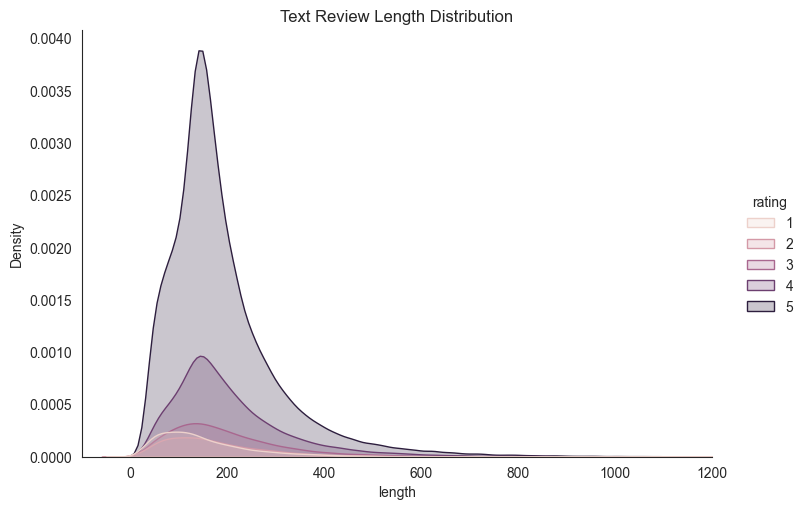

In [ ]:
sns.set_style('white')
(sns.displot(data=latest_review, x='length', hue='rating', kind='kde', fill=True, aspect=1.5)
    .set(xlim=(-100, 1200), title='Text Review Length Distribution'));

In [ ]:
# Compare mean review length across ratings
grouped = latest_review.groupby('rating')['length'].agg(mean_length='mean', count='count').reset_index().round(1)
grouped

rating  mean_length   count
0       1        161.5    9067
1       2        189.4    8231
2       3        207.6   14588
3       4        208.5   37039
4       5        191.4  123302

##### Rating distribution

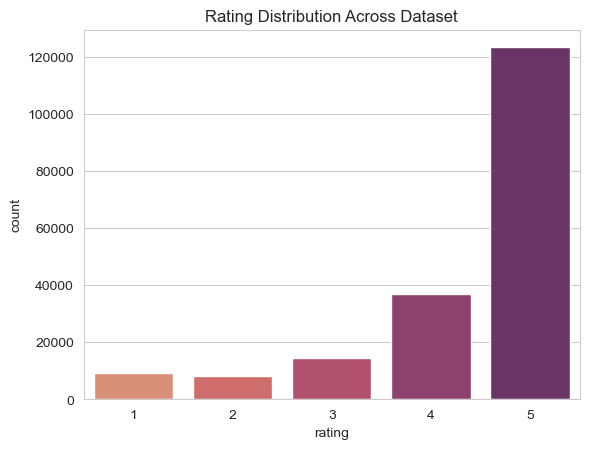

In [ ]:
sns.set_style('whitegrid')
sns.countplot(data=latest_review, x='rating', palette='flare').set_title('Rating Distribution Across Dataset')
plt.show()

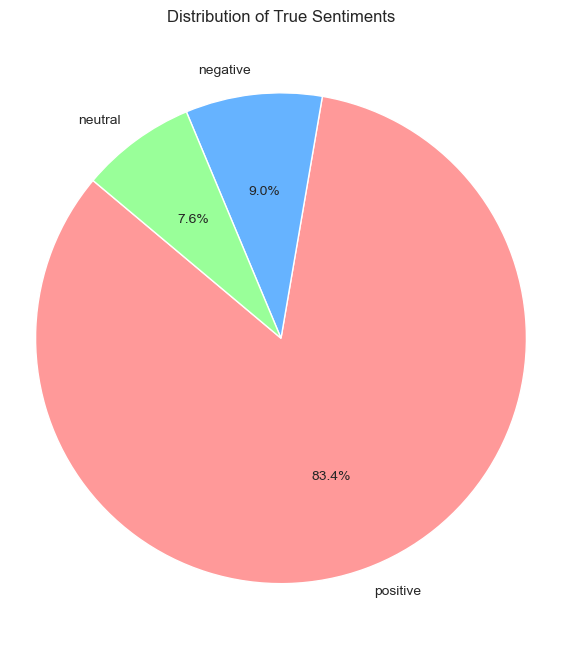

In [ ]:
sentiment_counts = latest_review['true_sentiment'].value_counts()

# Define custom colors
colors = ['#ff9999','#66b3ff','#99ff99']

# Create a pie chart
plt.figure(figsize=(7, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of True Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

## Most common words (unigrams)

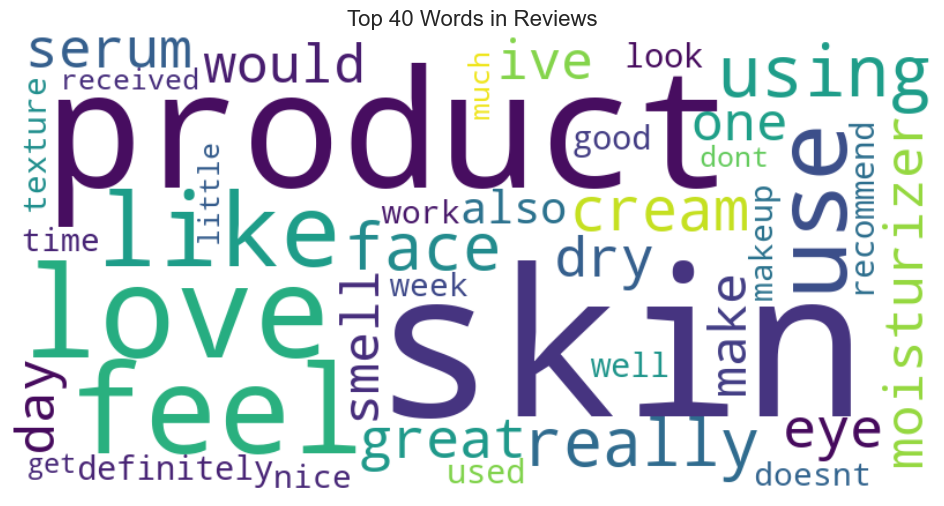

In [ ]:
top_words = Counter(' '.join(latest_review['lemma_text']).split()).most_common(40)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Plot the word cloud with a title
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Reviews', fontsize=16)
plt.show()


## Bigrams

##### Before, I was looking at one word at a time (unigrams), but now I'm moving on to looking at pairs of words (bigrams). Bigrams give more context and therefore are more informative than single words.

Let's find combinations of the most frequent pairs of words using previously created column 'NLTK_text' with word sequence:

In [ ]:
# Create list of sorted bigrams
bigrams = Counter()
for phrase in latest_review['NLTK_text']:
    bigrams.update(nltk.bigrams(phrase))
    
bigrams_sorted = sorted(bigrams.items(), key=operator.itemgetter(1), reverse=True)
     

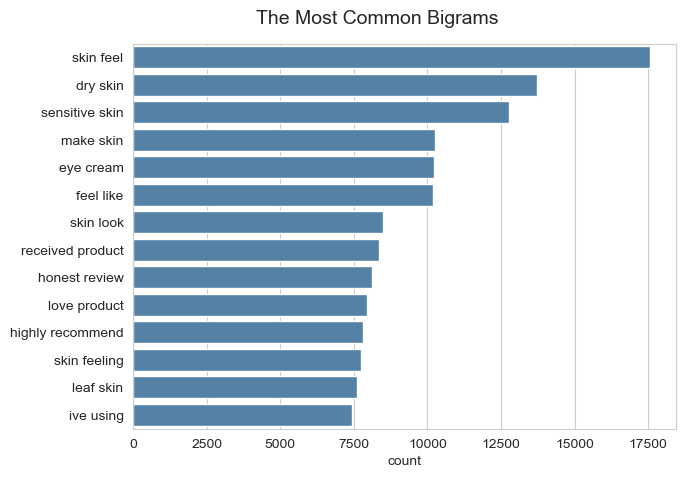

In [ ]:
# Visualize bigrams frequency
bigrams_df = pd.DataFrame(bigrams_sorted[:14], columns=['bigram', 'count'])

plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')

sns.barplot(x='count', y=[' '.join(bigram) for bigram in bigrams_df['bigram']], data=bigrams_df, color='steelblue')

plt.xlabel('count')
plt.title('The Most Common Bigrams', fontsize=14, y=1.03, x=0.45);
plt.show()

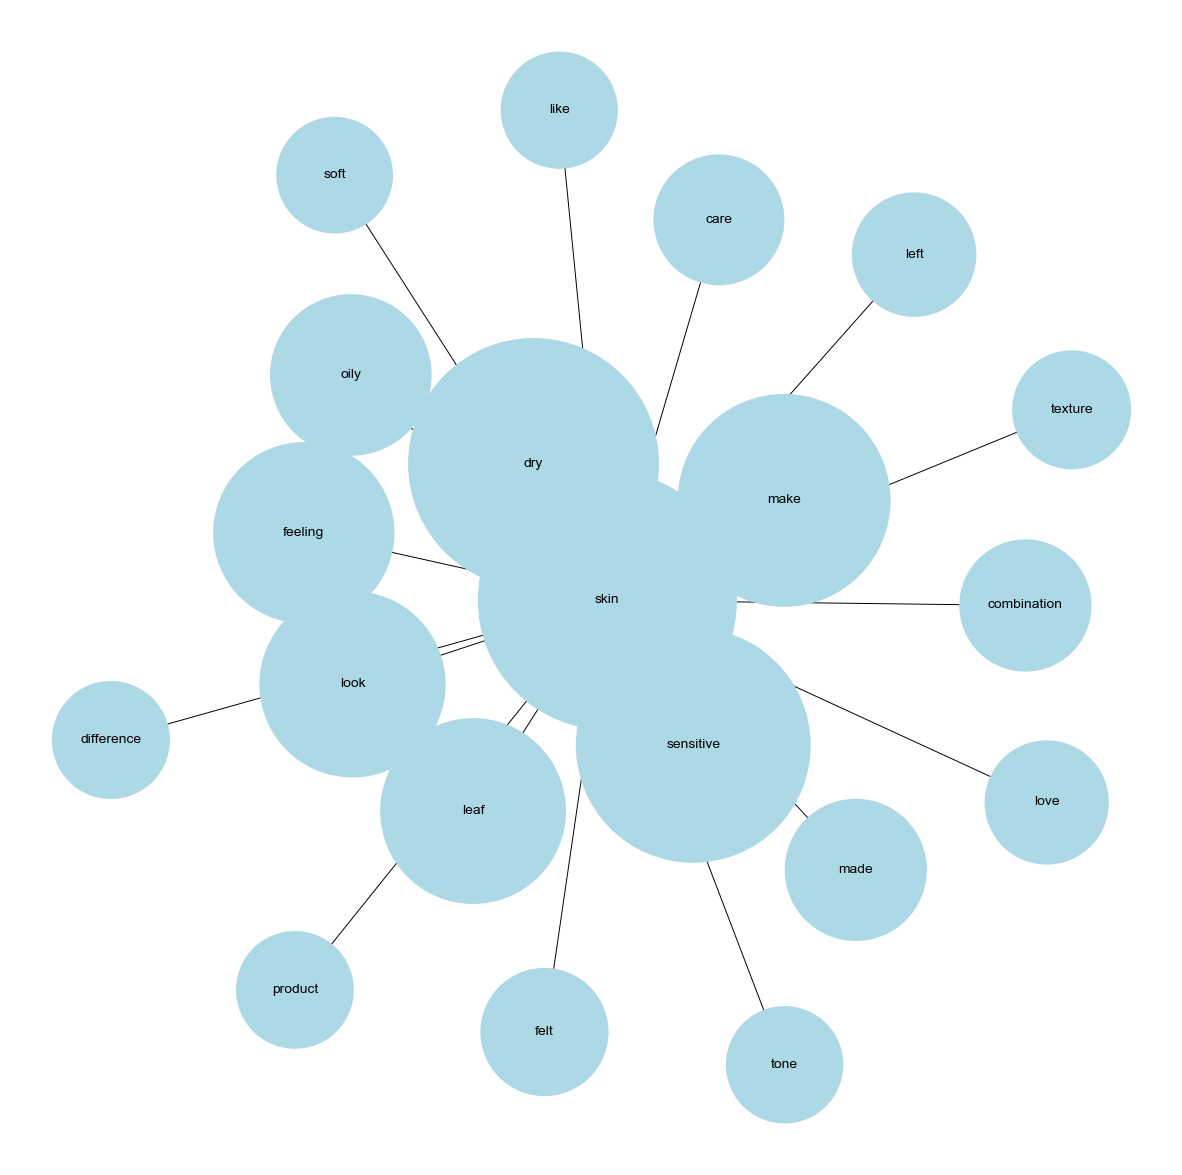

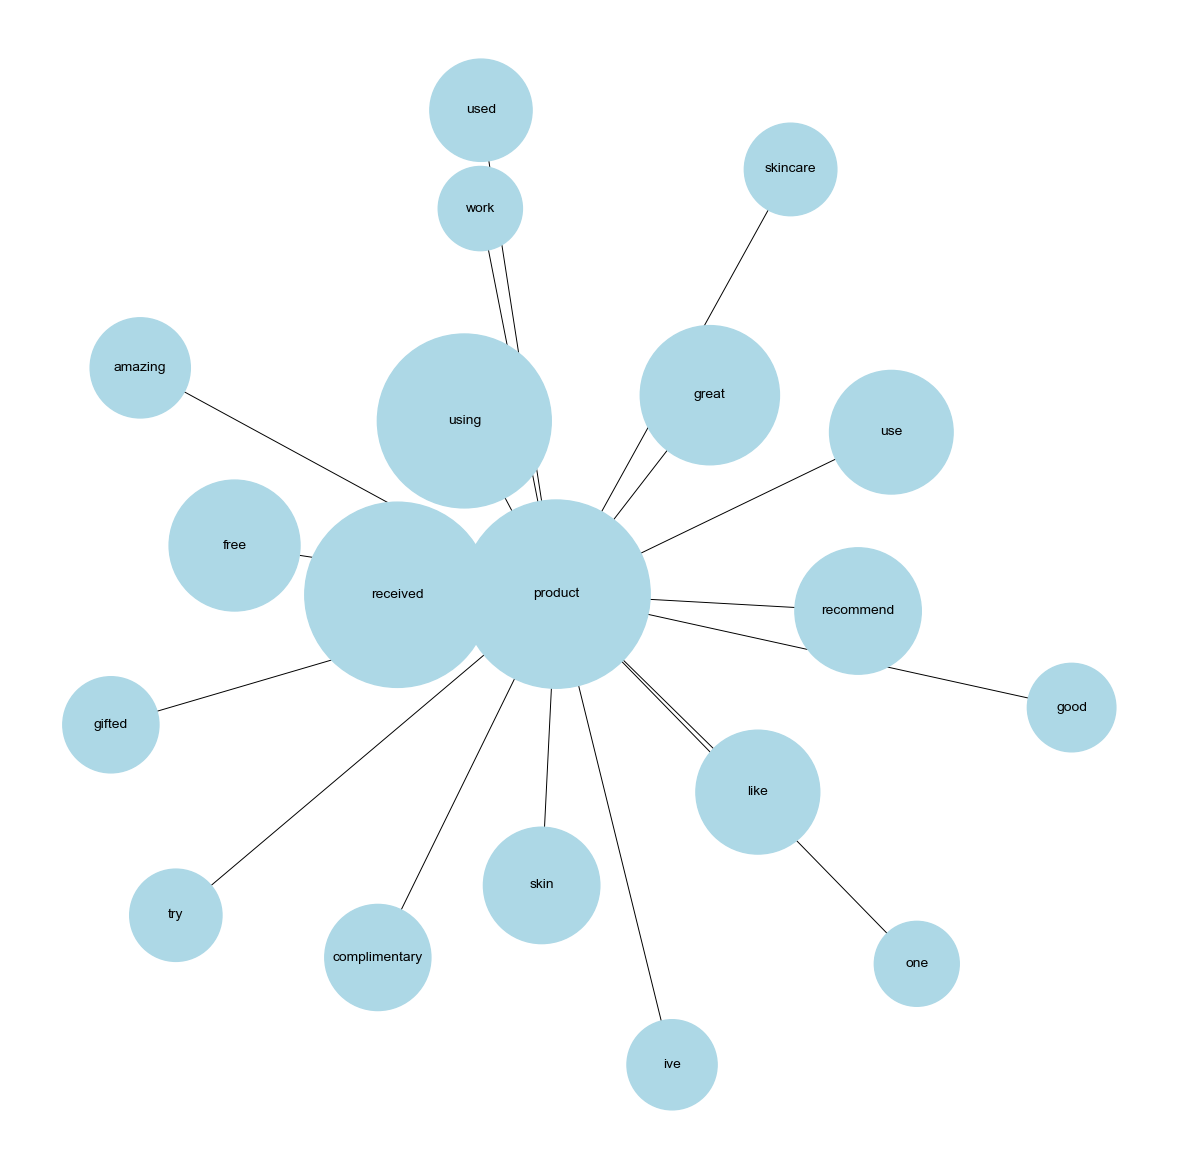

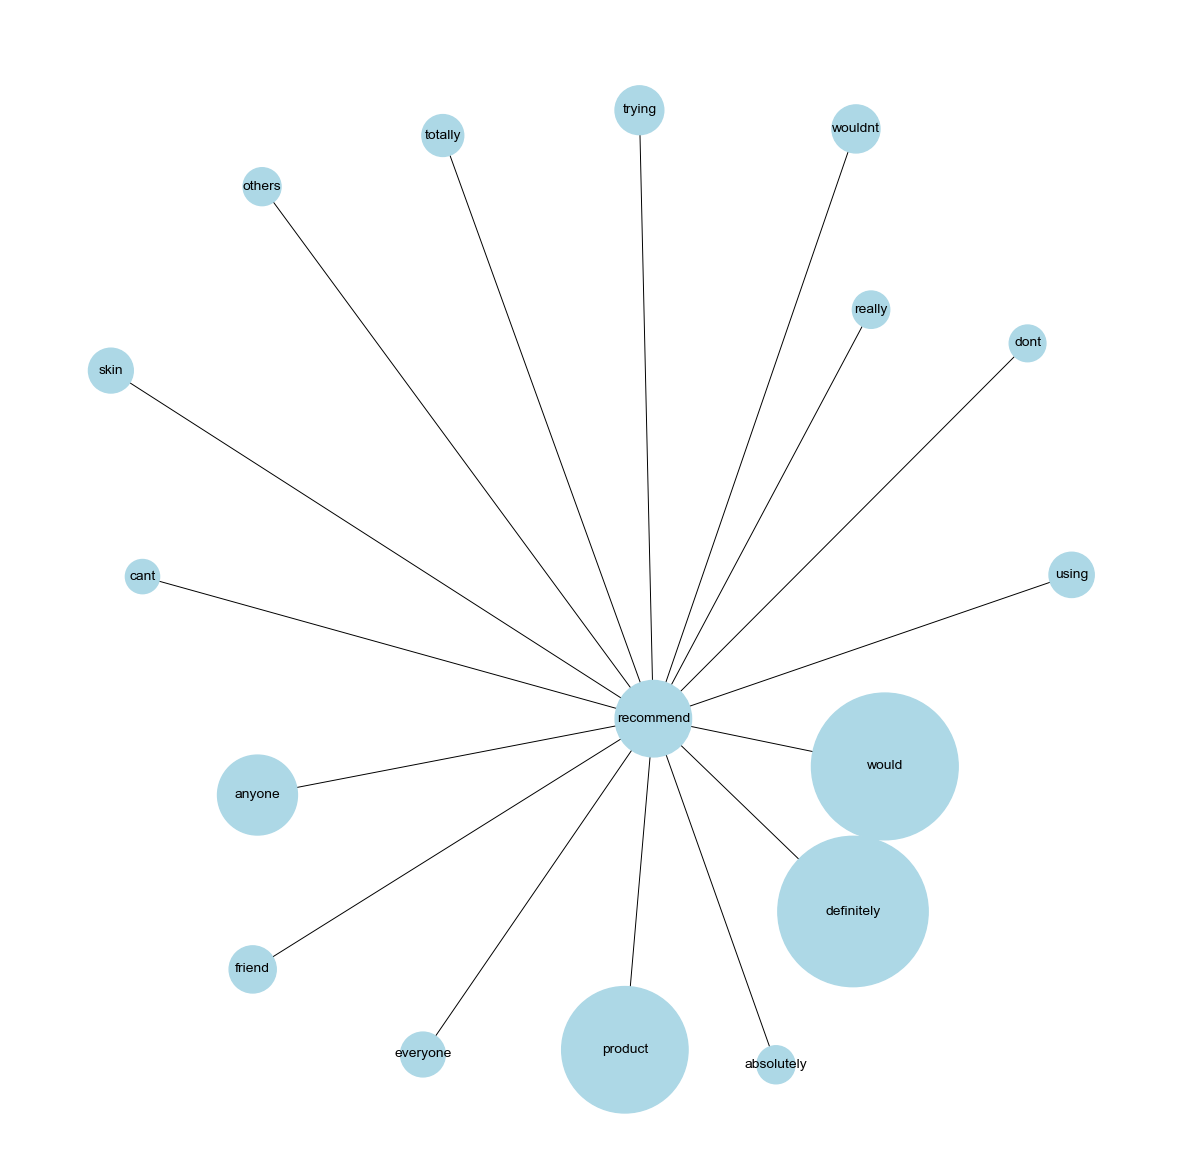

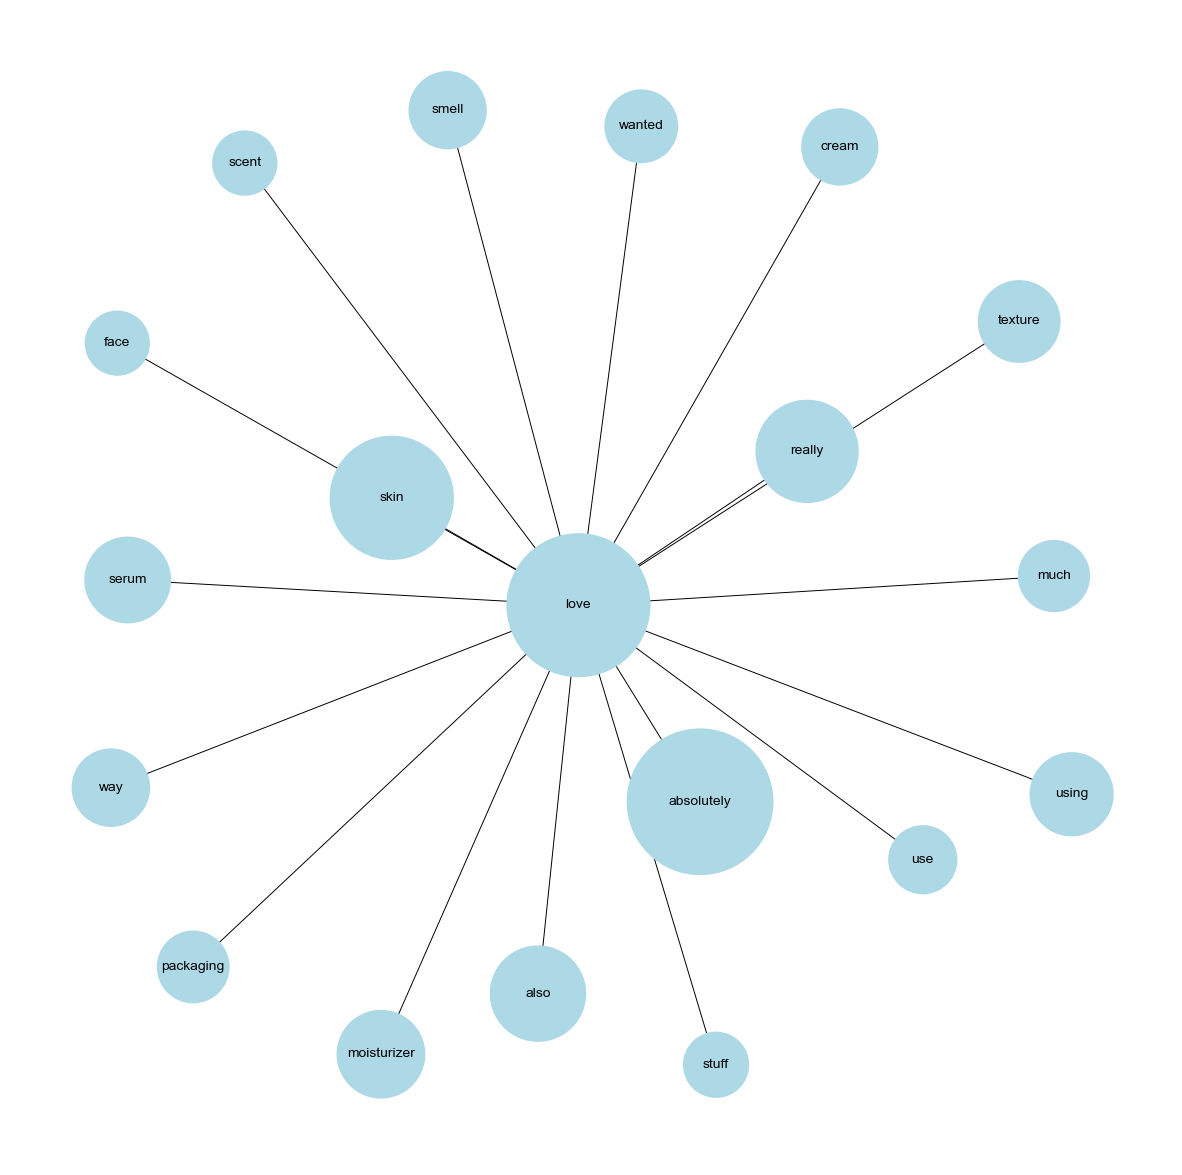

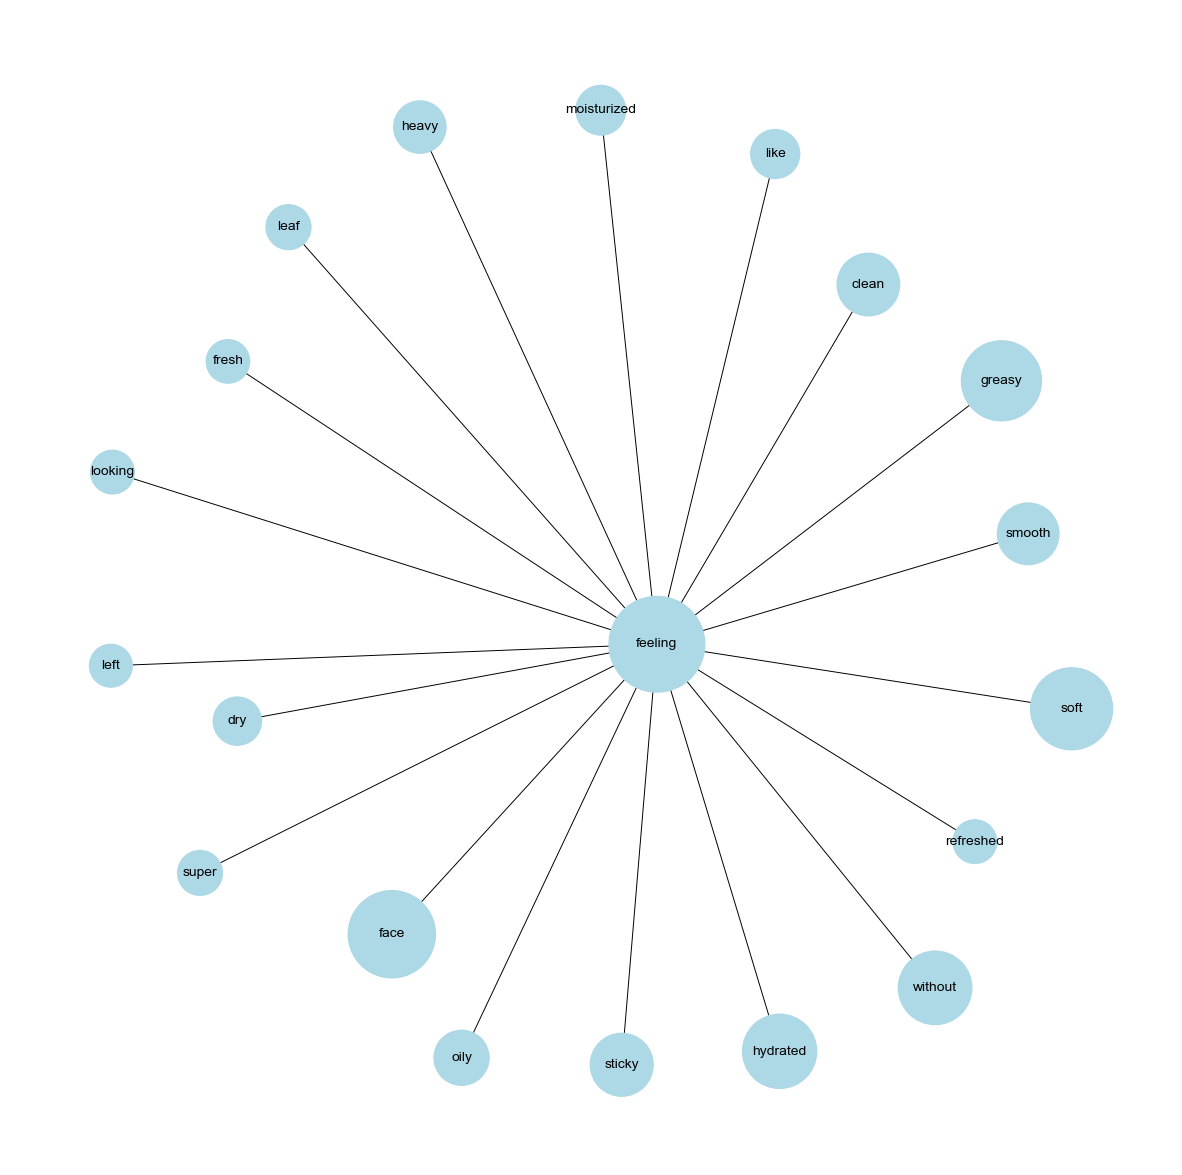

In [ ]:
def draw_network(key_word: str, lst_start: int, lst_end: int, 
                 spring_k=7, nsize_1=8, nsize_2=100):
    """Returns a network graph with the keyword in the center"""

    # Create a list of bigrams for the keyword
    merged_dict = defaultdict(int)
    for bigram, count in bigrams_sorted:
        if key_word in bigram:
            if bigram[0].startswith(key_word):
                key = bigram
            else:
                key = (bigram[1], bigram[0])
            merged_dict[key] += count
    bigram_lst = sorted(merged_dict.items(), key=lambda x: x[1], reverse=True)[lst_start:lst_end]


    # Build a network graph
    G = nx.Graph()
    fig, ax = plt.subplots(figsize=(15, 15))  # Increased the figure size
    plt.axis('off')

    # Set the sizes and positions of the nodes
    node_sizes = {key_word: 800}  # Increased node size for key_word
    for edge, size in bigram_lst:
        node1, node2 = edge
        G.add_edge(node1, node2, weight=size)
        node_sizes[node1] = node_sizes[node2] = size
    pos = nx.spring_layout(G, k=spring_k)
    nsize_lst = [node_sizes[v] * nsize_1 
                 if v != key_word 
                 else node_sizes[v] * nsize_2 
                 for v in node_sizes]
    
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', ax=ax, node_size=nsize_lst)
    nx.draw_networkx_labels(G, pos, font_size=10)
    nx.draw_networkx_edges(G, pos, width=0.7);

# Call the function with adjusted parameters
draw_network('skin', 1, 20, spring_k=15, nsize_1=2, nsize_2=10)
draw_network('product', 1, 19, spring_k=15, nsize_1=2, nsize_2=10)
draw_network('recommend', 1, 17, spring_k=15, nsize_1=2, nsize_2=10)
draw_network('love', 1, 19, spring_k=15,  nsize_1=2, nsize_2=10)
draw_network('feeling', 1, 20,spring_k=15,  nsize_1=2, nsize_2=10)
plt.show()

## Trigrams
##### Now, let's look at combinations of three words (trigrams). Yes, we can continue to increase the size of the word group further, but as a rule it is optimal to stop at a group of the size of three words.

#### Let's build a visualization of the most common trigrams:

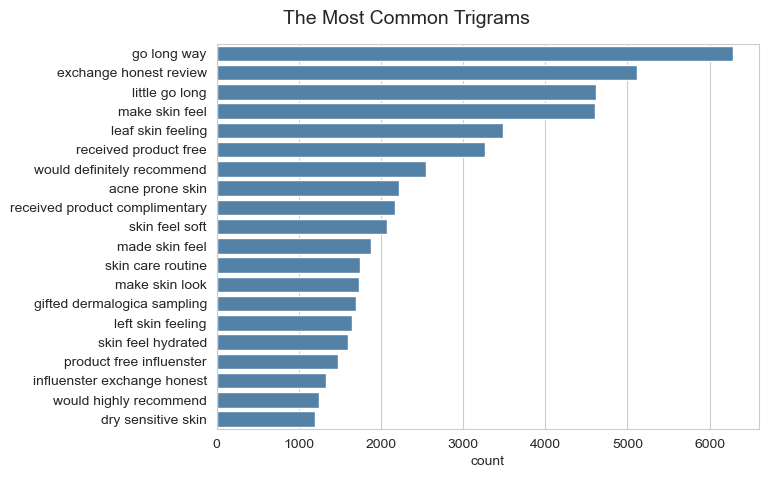

In [ ]:

# Create sorted list of all trigrams
trigrams = Counter()
for phrase in latest_review['NLTK_text']:
    trigrams.update(nltk.trigrams(phrase))
trigrams_sorted = sorted(trigrams.items(), key=operator.itemgetter(1), reverse=True)

# Create dataframe fromt the most common trigrams
trigrams_df = pd.DataFrame(trigrams_sorted[:20], columns=['trigram', 'count'])

# Draw a barplot 
plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')
sns.barplot(x='count', color='steelblue',
            y=[' '.join(trigram) for trigram in trigrams_df['trigram']], 
            data=trigrams_df)
plt.xlabel('count')
plt.title('The Most Common Trigrams', fontsize=14, y=1.03, x=0.35)
plt.show()

Here we see the most frequent mentions of time duration, mentions of skin feeling, 
an acne problem already encountered, and another interesting observation. 
Here we can see mentions of getting the product in exchange for an honest review and getting the product complimentary, etc. 
In my opinion, it is good that the text explicitly mentions such things, it allows customers to maintain trust in the products and brands.

Finally, let's look at an example of using the n-gram in a sample of interest - negative reviews. The most frequent trigrams in negative reviews:

In [ ]:
trigrams = Counter()
neg_df = latest_review[latest_review['true_sentiment'] == 'negative']
for phrase in neg_df['NLTK_text']:
    trigrams.update(nltk.trigrams(phrase))
trigrams_sorted = sorted(trigrams.items(), key=operator.itemgetter(1), reverse=True)
trigrams_sorted[:20]

[(('really', 'wanted', 'love'), 301),
 (('wanted', 'love', 'product'), 231),
 (('acne', 'prone', 'skin'), 220),
 (('really', 'wanted', 'like'), 216),
 (('exchange', 'honest', 'review'), 157),
 (('dont', 'waste', 'money'), 140),
 (('wanted', 'like', 'product'), 130),
 (('received', 'product', 'free'), 125),
 (('made', 'skin', 'feel'), 117),
 (('left', 'skin', 'feeling'), 110),
 (('make', 'skin', 'feel'), 109),
 (('didnt', 'notice', 'difference'), 103),
 (('excited', 'try', 'product'), 96),
 (('dry', 'sensitive', 'skin'), 92),
 (('didnt', 'see', 'difference'), 79),
 (('would', 'recommend', 'product'), 75),
 (('every', 'time', 'use'), 72),
 (('sits', 'top', 'skin'), 70),
 (('dont', 'sensitive', 'skin'), 67),
 (('high', 'hope', 'product'), 67)]

# 3) Identifying trends

## Data pre-processing

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd
import numpy as np
import os

import nltk
from nltk.corpus import PlaintextCorpusReader

#### Without stemming/lemmatization

In [ ]:
corpus_folder = 'corpus'

# Create a directory to store the corpus
if not os.path.exists(corpus_folder):
    os.makedirs(corpus_folder)

for index, r in latest_review.iterrows():
    id=r['author_id']
    product_id=r['product_id']
    review_title=str(r['review_title'])
    product_name=r['product_name']
    brand_name=r['brand_name']
    category=r['primary_category']
    secondary_category=r['secondary_category']
    review_text=str(r['review_text'])

    filename = f'{brand_name}/{id}.txt'  # Organize by category and title
    file_path = os.path.join(corpus_folder, filename)

    # Create the file and write the content
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    with open(file_path, 'w') as file:
        file.write(review_text + " " + review_title)

In [ ]:
from nltk.corpus.reader import CategorizedPlaintextCorpusReader
my_corpus = CategorizedPlaintextCorpusReader(corpus_folder, r'.*\.txt', cat_pattern=r'(\w+)')

file_ids = my_corpus.fileids()
categories = my_corpus.categories()

In [ ]:
print(file_ids)

['Algenist/10021044780.txt', 'Algenist/10021203314.txt', 'Algenist/10063444770.txt', 'Algenist/10070861196.txt', 'Algenist/10098407140.txt', 'Algenist/1011097171.txt', 'Algenist/10123555555.txt', 'Algenist/10153605116.txt', 'Algenist/10171021355.txt', 'Algenist/1019312430.txt', 'Algenist/10196032756.txt', 'Algenist/10200157518.txt', 'Algenist/10200158291.txt', 'Algenist/1020944891.txt', 'Algenist/10213715199.txt', 'Algenist/10230229648.txt', 'Algenist/1026142952.txt', 'Algenist/1026999014.txt', 'Algenist/10278696722.txt', 'Algenist/10296294920.txt', 'Algenist/1033136467.txt', 'Algenist/10333042505.txt', 'Algenist/10333244324.txt', 'Algenist/10368161042.txt', 'Algenist/1037494002.txt', 'Algenist/1037798133.txt', 'Algenist/10378897948.txt', 'Algenist/1038534209.txt', 'Algenist/1039063939.txt', 'Algenist/10431390281.txt', 'Algenist/1045492113.txt', 'Algenist/10456772550.txt', 'Algenist/10522233070.txt', 'Algenist/10542481920.txt', 'Algenist/10542563686.txt', 'Algenist/10544460623.txt', 'A

In [ ]:
print(categories)

['Algenist', 'Alpha', 'Anastasia', 'Augustinus', 'BeautyBio', 'Biossance', 'Bobbi', 'CANOPY', 'CAY', 'CLINIQUE', 'COOLA', 'Caudalie', 'Charlotte', 'Clarins', 'Community', 'DAMDAM', 'DERMAFLASH', 'Danessa', 'Dermalogica', 'Dior', 'Dr', 'Drunk', 'EADEM', 'Erno', 'Estée', 'Evian', 'FOREO', 'FaceGym', 'Farmacy', 'Fenty', 'First', 'Flora', 'Freck', 'GLO', 'GUERLAIN', 'Glow', 'Gucci', 'HABIT', 'HUM', 'Hanni', 'Herbivore', 'Hourglass', 'Hyper', 'ILIA', 'INC', 'IT', 'Iconic', 'Isle', 'JLo', 'Jack', 'Jillian', 'Josie', 'KORA', 'KORRES', 'Kate', 'Kiehl', 'Koh', 'Kosas', 'L', 'LANEIGE', 'LAWLESS', 'La', 'Lancôme', 'MARA', 'MERIT', 'MILK', 'Mario', 'Moon', 'Mount', 'Murad', 'NUDESTIX', 'Naturally', 'NuFACE', 'Nécessaire', 'OLEHENRIKSEN', 'ONE', 'Origins', 'PMD', 'Paula', 'Peace', 'Peter', 'Prima', 'RANAVAT', 'REN', 'ROSE', 'Rosebud', 'SEPHORA', 'SK', 'SOBEL', 'Saie', 'Saint', 'Shani', 'Shiseido', 'Skincare', 'Skinfix', 'Slip', 'Sol', 'St', 'StriVectin', 'Sulwhasoo', 'Summer', 'Sunday', 'Supergoop'

#### With stemming/lemmatization

In [ ]:
corpus_folder = 'corpus_lemma'

# Create a directory to store the corpus
if not os.path.exists(corpus_folder):
    os.makedirs(corpus_folder)

for index, r in latest_review.iterrows():
    id=r['author_id']
    product_id=r['product_id']
    review_title=str(r['review_title'])
    product_name=r['product_name']
    brand_name=r['brand_name']
    category=r['primary_category']
    secondary_category=r['secondary_category']
    review_text=str(r['lemma_text'])

    filename = f'{brand_name}/{id}.txt'  # Organize by category and title
    file_path = os.path.join(corpus_folder, filename)

    # Create the file and write the content
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    with open(file_path, 'w') as file:
        file.write(review_text + " " + review_title)

In [ ]:
from nltk.corpus.reader import CategorizedPlaintextCorpusReader
my_corpus = CategorizedPlaintextCorpusReader(corpus_folder, r'.*\.txt', cat_pattern=r'(\w+)')

file_ids = my_corpus.fileids()
categories = my_corpus.categories()

## LDA with sklearn - without lemmatization

In [ ]:
import preprocess2
reviews_corpus = preprocess2.load_corpus('corpus')
reviews_docs = preprocess2.corpus2docs(reviews_corpus)
reviews_docs_joined = [" ".join(x) for x in reviews_docs]  #joined to fit vectorizer

NameError: name 'pd' is not defined

In [ ]:
# CountVectorizer converts the text documents to a matrix of token counts
vectorizer = CountVectorizer()
ldareviews_vecs = vectorizer.fit_transform(reviews_docs_joined)

# get_feature_names saves all the words. This allows us to see the words in each topic later
feature_names = vectorizer.get_feature_names_out()

In [ ]:
# Install the package
# pip install pyldavis

### LDA - 10 topics

In [ ]:
# Build LDA Model
reviews_lda10 = LatentDirichletAllocation(n_components=10,               # Number of topics
                                      learning_method='online',   
                                      n_jobs = -1)              # use all available CPU
lda_output = reviews_lda10.fit_transform(ldareviews_vecs)

In [ ]:
# Write a function to display the 8 topics and for each topic we choose the top most frequent words. 
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(reviews_lda10, feature_names, no_top_words)

Topic 0:
cream eye eyes fine lines dark area around wrinkles circles liked really look noticed using
Topic 1:
skin love product feels great nan amazing serum feel recommend really soft smooth definitely glow
Topic 2:
product good price really get products try much still nan size think use time worth
Topic 3:
smell scent strong water cleansing smells face bad unfortunately okay get pimples broke come bit
Topic 4:
long goes way little glowy dewy keeps pleasant cooling bit dermalogica powder term la de
Topic 5:
lips lip balm nothing reviews money sephora formula back anything disappointed go old another never
Topic 6:
skin dry moisturizer face oily nan product really sensitive great feel use well greasy love
Topic 7:
product received using difference review free see sample honest influenster use results exchange weeks serum
Topic 8:
skin acne using routine use serum skincare spots breakouts retinol prone dark started helped weeks
Topic 9:
sunscreen cleanser makeup face mask use spf clean 

In [ ]:
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

# Generate the visuals
visual10 = pyLDAvis.lda_model.prepare(reviews_lda10, ldareviews_vecs, vectorizer, mds='tsne')
visual10

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1       1.139740  -4.663146       1        1  20.509093
6     -16.207785  12.837008       2        1  19.188648
2      -9.103297 -34.147446       3        1  15.853417
7       1.655439  31.513388       4        1   9.021154
8     -45.252235   4.775221       5        1   8.285480
9     -32.070187  32.445721       6        1   8.235641
0     -22.785824 -10.969471       7        1   6.600381
5      18.774776 -22.943998       8        1   4.999187
3      21.918257  10.511172       9        1   4.574743
4     -41.433720 -27.673998      10        1   2.732256, topic_info=          Term           Freq          Total Category  logprob  loglift
26270     skin  273533.000000  273533.000000  Default  30.0000  30.0000
6186     cream   52790.000000   52790.000000  Default  29.0000  29.0000
22254  product  150317.000000  150317.000000  Default  28.0000  28.0000
9857       eye   29859.000000   29859.000000  Default  27.0000  27.0000
16591     long   21515.000000   21515.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
30565       un     529.510783     530.431685  Topic10  -5.8470   3.5983
31906      way   14802.198838   21231.555166  Topic10  -2.5164   3.2393
16465   little   12391.150063   28870.624195  Topic10  -2.6942   2.7542
2984       bit    2870.297282   16186.436236  Topic10  -4.1567   1.8703
18851      nan    1901.816808   75319.227948  Topic10  -4.5683  -0.0789

[582 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
93         1  0.805289  absolutely
93         2  0.055889  absolutely
93         3  0.003089  absolutely
93         7  0.007902  absolutely
93         8  0.127797  absolutely
...      ...       ...         ...
32779      4  0.003432         yes
32779      8  0.996396         yes
32854      1  0.999295    youthful
32876      8  0.999206        yttp
32921      8  0.998900        zero

[1003 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 3, 8, 9, 10, 1, 6, 4, 5])

### LDA - 8 topics

In [ ]:
# Build LDA Model
reviews_lda8 = LatentDirichletAllocation(n_components=8,               # Number of topics
                                      learning_method='online',   
                                      n_jobs = -1)              # use all available CPU
lda_output = reviews_lda8.fit_transform(ldareviews_vecs)

In [ ]:
# Write a function to display the 8 topics and for each topic we choose the top most frequent words. 
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(reviews_lda8, feature_names, no_top_words)

Topic 0:
skin product using use used nan serum see acne really difference dry sensitive products face
Topic 1:
mask lips lip bad redness worth anything get buy love ever nothing reviews tried money
Topic 2:
product cleanser face smell bottle good use smells really packaging price get great makeup scent
Topic 3:
light color smells tan holy grail either lovely weight self orange thicker tanning easy version
Topic 4:
sunscreen makeup skin oily spf white wear face prone usually cast acid even best sun
Topic 5:
skin love product great nan moisturizer feels feel dry really feeling face soft cream amazing
Topic 6:
cream eye received product eyes review free honest influenster sample lines fine exchange really area
Topic 7:
balm fragrance gave needed bright become mascara free balms sent lauder black tired sampling plan


In [ ]:
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

# Generate the visuals
visual8 = pyLDAvis.lda_model.prepare(reviews_lda8, ldareviews_vecs, vectorizer, mds='tsne')
visual8

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0       0.034294  79.135452       1        1  28.418430
5      -0.550268   1.900156       2        1  27.065144
2     -60.542702  50.361401       3        1  12.837285
6      60.404240  49.824913       4        1   9.308649
1      74.381096 -15.827987       5        1   8.704426
4     -34.317745 -67.029587       6        1   8.038953
3     -76.634758 -14.874598       7        1   3.148841
7      32.861080 -68.672935       8        1   2.478271, topic_info=             Term           Freq          Total Category  logprob  loglift
26270        skin  274020.000000  274020.000000  Default  30.0000  30.0000
6186        cream   51933.000000   51933.000000  Default  29.0000  29.0000
16195       light   22878.000000   22878.000000  Default  28.0000  28.0000
9857          eye   29974.000000   29974.000000  Default  27.0000  27.0000
23231    received   28876.000000   28876.000000  Default  26.0000  26.0000
...           ...            ...            ...      ...      ...      ...
12064         gon     749.470493     750.368514   Topic8  -5.4020   3.6964
27506        star    1153.061509    2477.128966   Topic8  -4.9712   2.9329
11123        free    1867.528777   17530.308465   Topic8  -4.4890   1.4583
632    afterwards     934.573862    2126.993923   Topic8  -5.1812   2.8752
1378      another     935.384208    5022.661280   Topic8  -5.1804   2.0169

[457 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
91         5  0.999592  absolute
282        2  0.221211      acid
282        6  0.778647      acid
305        1  0.798552      acne
305        6  0.201384      acne
...      ...       ...       ...
32546      5  0.532585     worth
32546      6  0.006064     worth
32622      4  0.999691   wrinkle
32625      1  0.120842  wrinkles
32625      4  0.878992  wrinkles

[720 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 3, 7, 2, 5, 4, 8])

### LDA - 6 topics

In [ ]:
# Build LDA Model
reviews_lda6 = LatentDirichletAllocation(n_components=6,               # Number of topics
                                      learning_method='online',   
                                      n_jobs = -1)              # use all available CPU
lda_output = reviews_lda6.fit_transform(ldareviews_vecs)

In [ ]:
# Write a function to display the 10 topics and for each topic we choose the top most frequent words. 
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(reviews_lda6, feature_names, no_top_words)

Topic 0:
received product review free sample lips honest lip influenster exchange balm complimentary size full got
Topic 1:
cream eye eyes using serum difference see fine lines noticed results product dark weeks use
Topic 2:
cleanser use packaging oil love bottle products clean gentle cleansing ingredients wanted effective pump acid
Topic 3:
skin makeup love scent sunscreen light nice great really product nan moisturizer little well goes
Topic 4:
skin product using use acne used face nan price get really much time good dry
Topic 5:
skin love product dry nan great face feel feels amazing using recommend use soft moisturizer


In [ ]:
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

# Generate the visuals
visual = pyLDAvis.lda_model.prepare(reviews_lda6, ldareviews_vecs, vectorizer, mds='tsne')
visual

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
4     -78.110764  41.176376       1        1  26.389306
5     -63.061874 -34.505524       2        1  24.558532
3      46.010445  26.431541       3        1  20.126582
2     -18.421841  13.770397       4        1  11.691265
1      13.574533 -43.746674       5        1  10.895600
0     -10.708350  79.153206       6        1   6.338716, topic_info=             Term           Freq          Total Category  logprob  loglift
26270        skin  272727.000000  272727.000000  Default  30.0000  30.0000
6186        cream   52954.000000   52954.000000  Default  29.0000  29.0000
23231    received   27547.000000   27547.000000  Default  28.0000  28.0000
22254     product  149602.000000  149602.000000  Default  27.0000  27.0000
9857          eye   29678.000000   29678.000000  Default  26.0000  26.0000
...           ...            ...            ...      ...      ...      ...
30278         try    4483.822936   23343.747636   Topic6  -4.5522   1.1086
18851         nan    3846.780387   75183.979057   Topic6  -4.7055  -0.2142
22663  purchasing    1790.225171    3379.474606   Topic6  -5.4704   2.1231
26615       small    2008.305666    7283.952803   Topic6  -5.3554   1.4701
22656    purchase    1802.439645    6702.722613   Topic6  -5.4636   1.4451

[396 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
93         1  0.142213  absolutely
93         2  0.751386  absolutely
93         3  0.082528  absolutely
93         4  0.023932  absolutely
105        2  0.999456      absorb
...      ...       ...         ...
32625      5  0.999820    wrinkles
32750      1  0.841853       years
32750      2  0.032367       years
32750      4  0.125697       years
32854      2  0.999281    youthful

[644 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 4, 3, 2, 1])

## LDA with sklearn - with lemmatization

In [ ]:
import preprocess2
reviews_corpus = preprocess2.load_corpus('corpus_lemma')
reviews_docs = preprocess2.corpus2docs(reviews_corpus)
reviews_docs_joined = [" ".join(x) for x in reviews_docs]  #joined to fit vectorizer

In [ ]:
# CountVectorizer converts the text documents to a matrix of token counts
vectorizer = CountVectorizer()
ldareviews_vecs = vectorizer.fit_transform(reviews_docs_joined)

# get_feature_names saves all the words. This allows us to see the words in each topic later
feature_names = vectorizer.get_feature_names_out()

### LDA - 10 topics

In [ ]:
# Build LDA Model
reviews_lda10 = LatentDirichletAllocation(n_components=10,               # Number of topics
                                      learning_method='online',   
                                      n_jobs = -1)              # use all available CPU
lda_output = reviews_lda10.fit_transform(ldareviews_vecs)

In [ ]:
# Write a function to display the 8 topics and for each topic we choose the top most frequent words. 
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(reviews_lda10, feature_names, no_top_words)

Topic 0:
cream eye eyes fine lines dark area around wrinkles circles liked really look noticed using
Topic 1:
skin love product feels great nan amazing serum feel recommend really soft smooth definitely glow
Topic 2:
product good price really get products try much still nan size think use time worth
Topic 3:
smell scent strong water cleansing smells face bad unfortunately okay get pimples broke come bit
Topic 4:
long goes way little glowy dewy keeps pleasant cooling bit dermalogica powder term la de
Topic 5:
lips lip balm nothing reviews money sephora formula back anything disappointed go old another never
Topic 6:
skin dry moisturizer face oily nan product really sensitive great feel use well greasy love
Topic 7:
product received using difference review free see sample honest influenster use results exchange weeks serum
Topic 8:
skin acne using routine use serum skincare spots breakouts retinol prone dark started helped weeks
Topic 9:
sunscreen cleanser makeup face mask use spf clean 

In [ ]:
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

# Generate the visuals
visual10 = pyLDAvis.lda_model.prepare(reviews_lda10, ldareviews_vecs, vectorizer, mds='tsne')
visual10

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1       1.139740  -4.663146       1        1  20.509093
6     -16.207785  12.837008       2        1  19.188648
2      -9.103297 -34.147446       3        1  15.853417
7       1.655439  31.513388       4        1   9.021154
8     -45.252235   4.775221       5        1   8.285480
9     -32.070187  32.445721       6        1   8.235641
0     -22.785824 -10.969471       7        1   6.600381
5      18.774776 -22.943998       8        1   4.999187
3      21.918257  10.511172       9        1   4.574743
4     -41.433720 -27.673998      10        1   2.732256, topic_info=          Term           Freq          Total Category  logprob  loglift
26270     skin  273533.000000  273533.000000  Default  30.0000  30.0000
6186     cream   52790.000000   52790.000000  Default  29.0000  29.0000
22254  product  150317.000000  150317.000000  Default  28.0000  28.0000
9857       eye   29859.000000   29859.000000  Default  27.0000  27.0000
16591     long   21515.000000   21515.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
30565       un     529.510783     530.431685  Topic10  -5.8470   3.5983
31906      way   14802.198838   21231.555166  Topic10  -2.5164   3.2393
16465   little   12391.150063   28870.624195  Topic10  -2.6942   2.7542
2984       bit    2870.297282   16186.436236  Topic10  -4.1567   1.8703
18851      nan    1901.816808   75319.227948  Topic10  -4.5683  -0.0789

[582 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
93         1  0.805289  absolutely
93         2  0.055889  absolutely
93         3  0.003089  absolutely
93         7  0.007902  absolutely
93         8  0.127797  absolutely
...      ...       ...         ...
32779      4  0.003432         yes
32779      8  0.996396         yes
32854      1  0.999295    youthful
32876      8  0.999206        yttp
32921      8  0.998900        zero

[1003 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 3, 8, 9, 10, 1, 6, 4, 5])

### LDA - 8 topics

In [ ]:
# Build LDA Model
reviews_lda8 = LatentDirichletAllocation(n_components=8,               # Number of topics
                                      learning_method='online',   
                                      n_jobs = -1)              # use all available CPU
lda_output = reviews_lda8.fit_transform(ldareviews_vecs)

In [ ]:
# Write a function to display the 8 topics and for each topic we choose the top most frequent words. 
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(reviews_lda8, feature_names, no_top_words)

Topic 0:
skin product using use used nan serum see acne really difference dry sensitive products face
Topic 1:
mask lips lip bad redness worth anything get buy love ever nothing reviews tried money
Topic 2:
product cleanser face smell bottle good use smells really packaging price get great makeup scent
Topic 3:
light color smells tan holy grail either lovely weight self orange thicker tanning easy version
Topic 4:
sunscreen makeup skin oily spf white wear face prone usually cast acid even best sun
Topic 5:
skin love product great nan moisturizer feels feel dry really feeling face soft cream amazing
Topic 6:
cream eye received product eyes review free honest influenster sample lines fine exchange really area
Topic 7:
balm fragrance gave needed bright become mascara free balms sent lauder black tired sampling plan


In [ ]:
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

# Generate the visuals
visual8 = pyLDAvis.lda_model.prepare(reviews_lda8, ldareviews_vecs, vectorizer, mds='tsne')
visual8

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0       0.034294  79.135452       1        1  28.418430
5      -0.550268   1.900156       2        1  27.065144
2     -60.542702  50.361401       3        1  12.837285
6      60.404240  49.824913       4        1   9.308649
1      74.381096 -15.827987       5        1   8.704426
4     -34.317745 -67.029587       6        1   8.038953
3     -76.634758 -14.874598       7        1   3.148841
7      32.861080 -68.672935       8        1   2.478271, topic_info=             Term           Freq          Total Category  logprob  loglift
26270        skin  274020.000000  274020.000000  Default  30.0000  30.0000
6186        cream   51933.000000   51933.000000  Default  29.0000  29.0000
16195       light   22878.000000   22878.000000  Default  28.0000  28.0000
9857          eye   29974.000000   29974.000000  Default  27.0000  27.0000
23231    received   28876.000000   28876.000000  Default  26.0000  26.0000
...           ...            ...            ...      ...      ...      ...
12064         gon     749.470493     750.368514   Topic8  -5.4020   3.6964
27506        star    1153.061509    2477.128966   Topic8  -4.9712   2.9329
11123        free    1867.528777   17530.308465   Topic8  -4.4890   1.4583
632    afterwards     934.573862    2126.993923   Topic8  -5.1812   2.8752
1378      another     935.384208    5022.661280   Topic8  -5.1804   2.0169

[457 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
91         5  0.999592  absolute
282        2  0.221211      acid
282        6  0.778647      acid
305        1  0.798552      acne
305        6  0.201384      acne
...      ...       ...       ...
32546      5  0.532585     worth
32546      6  0.006064     worth
32622      4  0.999691   wrinkle
32625      1  0.120842  wrinkles
32625      4  0.878992  wrinkles

[720 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 3, 7, 2, 5, 4, 8])

### LDA - 6 topics

In [ ]:
# Build LDA Model
reviews_lda6 = LatentDirichletAllocation(n_components=6,               # Number of topics
                                      learning_method='online',   
                                      n_jobs = -1)              # use all available CPU
lda_output = reviews_lda6.fit_transform(ldareviews_vecs)

In [ ]:
# Write a function to display the 10 topics and for each topic we choose the top most frequent words. 
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(reviews_lda6, feature_names, no_top_words)

Topic 0:
cream eye eyes fine lines goes little way long greasy love look really night dark
Topic 1:
product sunscreen smell good price smells makeup really nan little great get worth well bit
Topic 2:
skin use acne using product sensitive dry face used every nan really even get never
Topic 3:
face anything oil moisturizer without lotion back tried reviews drops put obsessed either moisturizers try
Topic 4:
skin love moisturizer feels great nan dry really feel product nice light oily hydrating hydrated
Topic 5:
product using serum see difference results skin weeks noticed use formula sample try used notice
Topic 6:
packaging size full love got actually hard high get bought comes sample sephora surprised spot
Topic 7:
skin love product face amazing recommend clean nan best definitely mask use feel soft great
Topic 8:
product received review lips honest free lip influenster exchange balm liked color gave went hours
Topic 9:
cleanser pores dewy holy hands grail keeps extra wash remove clea

In [ ]:
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

# Generate the visuals
visual = pyLDAvis.lda_model.prepare(reviews_lda6, ldareviews_vecs, vectorizer, mds='tsne')
visual

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      -93.032829  -79.473839       1        1  19.791102
2       16.068411  -64.964333       2        1  15.850007
1      135.487518  -13.055683       3        1  12.387896
0      -12.777233 -152.234726       4        1  11.297831
5       47.477520   18.200983       5        1  10.647643
7      -23.746910  100.568527       6        1  10.562979
3      -40.599026    3.855176       7        1   6.470831
6       88.488373   99.121567       8        1   5.235009
8       97.620903 -110.199562       9        1   4.546619
9     -125.196777   34.049072      10        1   3.210083, topic_info=           Term           Freq          Total Category  logprob  loglift
26270      skin  273014.000000  273014.000000  Default  30.0000  30.0000
6186      cream   52600.000000   52600.000000  Default  29.0000  29.0000
16767      love  106232.000000  106232.000000  Default  28.0000  28.0000
22254   product  150359.000000  150359.000000  Default  27.0000  27.0000
4929   cleanser   20387.000000   20387.000000  Default  26.0000  26.0000
...         ...            ...            ...      ...      ...      ...
26616   smaller    1167.677093    2204.983485  Topic10  -5.2173   2.8032
11650    gentle    1615.152154   10388.338823  Topic10  -4.8929   1.5776
28679     takes    1219.715606    3065.304375  Topic10  -5.1737   2.5173
19820       oil    1339.066067   12898.444256  Topic10  -5.0803   1.1737
18851       nan    1605.393038   74984.307121  Topic10  -4.8990  -0.4050

[587 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
91         6  0.999351    absolute
93         1  0.299812  absolutely
93         3  0.003316  absolutely
93         4  0.041090  absolutely
93         6  0.646842  absolutely
...      ...       ...         ...
32622      5  0.999455     wrinkle
32625      4  0.702955    wrinkles
32625      5  0.296916    wrinkles
32854      4  0.999667    youthful
32876      7  0.999354        yttp

[944 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 1, 6, 8, 4, 7, 9, 10])

## Biterm Model Topic

In [ ]:
# pip install bitermplus

In [ ]:
# import gensim
# from gensim import corpora

# from nltk.corpus import stopwords
# stop_list = stopwords.words('english')

# bitreviews_docs = [my_corpus.words(f) for f in my_corpus.fileids()] # Take all files
# bitreviews_docs2 = [[w.lower() for w in doc] for doc in bitreviews_docs]    # Lower case
# bitreviews_docs3 = [[w for w in doc if re.search('^[a-z]+$',w)] for doc in bitreviews_docs2] # Alphabets
# bitreviews_docs4 = [[w for w in doc if w not in stop_list] for doc in bitreviews_docs3] # Stopwords
# bitreviews_dictionary = corpora.Dictionary(bitreviews_docs4)
# print(bitreviews_dictionary)

In [ ]:
reviews_docs_joined

In [ ]:
import bitermplus as btm

# PREPROCESSING
# Obtaining terms frequency in a sparse matrix and corpus vocabulary
X, vocabulary, vocab_dict = btm.get_words_freqs(reviews_docs_joined)
tf = np.array(X.sum(axis=0)).ravel()
# Vectorizing documents
bitreviews_vec = btm.get_vectorized_docs(reviews_docs_joined, vocabulary)
bitreviews_lens = list(map(len, bitreviews_vec))
# Generating biterms
biterms = btm.get_biterms(bitreviews_vec)

# INITIALIZING AND RUNNING MODEL
model = btm.BTM(
    X, vocabulary, seed=12321, T=8, M=20, alpha=50/8, beta=0.01)
model.fit(biterms, iterations=20)
p_zd = model.transform(bitreviews_vec)

# METRICS
perplexity = btm.perplexity(model.matrix_topics_words_, p_zd, X, 8)
coherence = btm.coherence(model.matrix_topics_words_, X, M=20)
# or
perplexity = model.perplexity_
coherence = model.coherence_

# LABELS
model.labels_
# or
btm.get_docs_top_topic(reviews_docs_joined, model.matrix_docs_topics_)

100%|██████████| 234461/234461 [00:05<00:00, 44537.92it/s]


documents  label
0       absolutely love product need collagen really n...      1
1       best bha toner used applies cleanly dries abso...      1
2       stuff impressed area around eyes felt looked u...      3
3       eye renewal amazing trying free sample days no...      3
4       use nightly moisturizer changed whole game che...      2
...                                                   ...    ...
234456  combination skin specifically super dry skin a...      1
234457  handy stick found harsh sensitive rosacea skin...      0
234458  use whitening toothpaste product pleased resul...      4
234459  tested store really liked bottle bought smells...      4
234460  used daily whitening noticiable repurchasing t...      4

[234461 rows x 2 columns]

In [ ]:
import tmplot as tmp

# Run the interactive report interface
tmp.report(model=model, docs=reviews_docs_joined)

#### Find stable topics

In [ ]:
import pickle as pkl
import tmplot as tmp
import glob

# Loading saved models
models_files = sorted(glob.glob(r'results/model[0-9].pkl'))
models = []
for fn in models_files:
    file = open(fn, 'rb')
    models.append(pkl.load(file))
    file.close()

# Choosing reference model
np.random.seed(122334)
reference_model = np.random.randint(1, 6)

# Getting close topics
close_topics, close_kl = tmp.get_closest_topics(
    models, method="sklb", ref=reference_model)

# Getting stable topics
stable_topics, stable_kl = tmp.get_stable_topics(
    close_topics, close_kl, ref=reference_model, thres=0.7)

# Stable topics indices list
print(stable_topics[:, reference_model])

## Clustering

In [74]:
import sklearn.datasets

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

from sklearn.cluster import KMeans

import logging
import sys
from time import time

import numpy as np


logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


dataset = sklearn.datasets.load_files('C:\\Users\\leele\\Documents\\GitHub\\text_analytics\\corpus')


print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]

print("Extracting features from the training dataset "
      "using a sparse vectorizer")
t0 = time()
vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 2, stop_words = 'english')

X = vectorizer.fit_transform(dataset.data)

print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()



km = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=10, verbose = False)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\leele\\Documents\\GitHub\\text_analytics\\corpus\\ONE\\SIZE by Patrick Starrr'